In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA
#%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/TCK_AE-master/TCK_AE-master/

/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA


In [ ]:
%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/TCK_AE-master/TCK_AE-master

/content/gdrive/My Drive/VRIF ANOMALY DETECTION/TCK_AE-master/TCK_AE-master


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import multivariate_normal as mvn
import math

from numpy.linalg import slogdet, det, solve
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA
#%cd /content/gdrive/My Drive/VRIF ANOMALY DETECTION/TCK_AE-master/TCK_AE-master
#!pwd

#df = pd.read_csv("df_cic_ids_normalized.csv")
#df = pd.read_csv("df_nsl_kdd_normalized.csv")
df = pd.read_csv("anom_870_hp_annotated_normalized.csv")
#df = pd.read_csv("normal_data_revised.csv")

# cols = ["Fwd Pkt Len Max","Fwd Pkt Len Min","Fwd Pkt Len Mean","Fwd Pkt Len Std","Bwd Pkt Len Max","Bwd Pkt Len Min","Bwd Pkt Len Mean",
# "Bwd Pkt Len Std","Flow Byts/s","Flow Pkts/s", "Bwd IAT Tot","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd Pkts/s","Bwd Pkts/s",
# "Pkt Len Min","Pkt Len Max","Pkt Len Mean","Pkt Len Std","Pkt Len Var","Pkt Size Avg","Fwd Seg Size Avg",
# "Bwd Seg Size Avg","Init Fwd Win Byts","Init Bwd Win Byts","Fwd Seg Size Min","Idle Min","Label"]

# X = df[["core:sample_count","deepsig:full_seconds"]].values
# scaler = preprocessing.StandardScaler()


cols = [  "deepsig:snr_estimate", "deepsig:rssi" ,"core:freq_center", "core:bandwidth","t_rel", "Anomaly Flag" ]
df = df[cols]
df

/content/gdrive/My Drive/VRIF ANOMALY DETECTION/DATA


,deepsig:snr_estimate,deepsig:rssi,core:freq_center,core:bandwidth,t_rel,Anomaly Flag
0,-0.837795,-1.527824,-1.192485,-0.526696,-1.783499,0
1,0.683483,0.217020,-0.163512,1.124343,-1.783499,0
2,0.692947,0.227876,0.852944,-1.009769,-1.783499,0
3,-0.991678,-1.579301,-1.192485,-0.505348,-1.783421,0
4,0.852869,0.536320,-0.158505,0.951024,-1.783421,0
...,...,...,...,...,...,...
114687,0.497695,0.465116,-0.166015,1.243915,1.677090,0
114688,0.266822,0.200314,0.852944,-0.913667,1.677090,0
114689,-1.149115,-1.286617,-1.207507,-0.466549,1.677280,0
114690,1.245642,1.460074,-0.143483,1.019100,1.677280,0


**Normal Data CIC-CSE_IDS**

In [ ]:
df_normal =  df.iloc[0:10000,:]
df_normal =  df_normal.iloc [[1, 2, 4, 6, 7, 9, 10, 12, 14, 16, 17, 18, 20, 22, 25, 26, 28, 29, 32, 33, 34, 36, 38, 39, 41, 45, 46, 47, 49, 51, 53, 55, 56, 58, 60, 63, 64, 65, 66, 67, 68, 71, 72, 75, 80, 81, 82, 84, 86, 89, 91, 96, 98, 99, 100, 104, 105, 106, 107, 108, 109, 111, 113, 117, 120, 123, 125, 127, 129, 131, 132, 135, 137, 139, 143, 144, 151, 152, 153, 154, 155, 156, 157, 160, 162, 163, 165, 166, 167, 169, 170, 171, 173, 176, 177, 181, 182, 183, 184, 185, 186, 187, 191, 192, 194, 195, 197, 199, 201, 202, 203, 204, 208, 209, 212, 213, 214, 216, 218, 219, 220, 221, 225, 226, 231, 232, 233, 234, 236, 239, 240, 243, 244, 250, 251, 252, 253, 255, 257, 260, 262, 264, 266, 267, 268, 270, 273, 274, 276, 279, 280, 281, 283, 285, 287, 288, 289, 291, 293, 294, 296, 298, 299, 301, 303, 309, 310, 311, 312, 313, 314, 317, 318, 322, 323, 324, 327, 328, 330, 331, 332, 334, 339, 340, 342, 343, 345, 347, 350, 352, 353, 355, 357, 358, 359, 361, 362, 364, 375, 377, 379, 381, 383, 385, 387, 388, 389, 391, 393, 400, 401, 402, 403, 404, 405, 406, 407, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 426, 427, 428, 430, 432, 434, 436, 438, 440, 442, 443, 445, 447, 449, 450, 453, 455, 456, 458, 460, 462, 463, 465, 470, 471, 473, 474, 476, 478, 479, 480, 482, 484, 486, 488, 490, 492, 494, 496, 498, 500, 502, 504, 505, 506, 507, 509, 511, 512, 513, 515, 516, 518, 519, 521, 523, 525, 526, 527, 529, 531, 532, 534, 538, 539, 540, 541, 542, 545, 546, 548, 549, 551, 552, 553, 555, 557, 558, 560, 562, 564, 566, 567, 569, 571, 572, 573, 574, 575, 576, 578, 580, 582, 583, 585, 587, 589, 591, 594, 595, 597, 599, 600, 602, 604, 605, 607, 609, 611, 613, 615, 618, 620, 622, 624, 627, 628, 630, 632, 633, 634, 635, 636, 637, 638, 640, 646, 647, 648, 649, 650, 651, 652, 657, 658, 659, 660, 661, 663, 664, 666, 667, 668, 670, 672, 674, 676, 678, 680, 681, 683, 685, 687, 689, 691, 692, 694, 695, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 711, 713, 715, 717, 719, 721, 723, 725, 727, 729, 731, 733, 734, 735, 736, 738, 739, 741, 743, 744, 747, 748, 749, 751, 752, 753, 754, 755, 757, 759, 760, 761, 762, 763, 764, 766, 768, 769, 770, 772, 773, 776, 777, 779, 781, 782, 786, 787, 788, 789, 791, 793, 794, 795, 796, 797, 798, 800, 802, 804, 808, 809, 810, 811, 812, 818, 820, 821, 822, 824, 826, 827, 828, 829, 830, 831, 832, 834, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 850, 851, 853, 854, 855, 857, 858, 861, 863, 865, 867, 870, 871, 872, 873, 875, 877, 878, 879, 884, 885, 886, 887, 888, 889, 892, 893, 894, 895, 896, 898, 900, 902, 903, 904, 905, 906, 908, 910, 911, 912, 921, 924, 925, 926, 927, 929, 930, 931, 932, 933, 938, 943, 949, 953, 954, 955, 956, 957, 962, 964, 965, 966, 967, 969, 970, 971, 973, 975, 976, 979, 986, 987, 988, 989, 990, 991, 992, 993, 994, 998, 999, 1000, 1001, 1002, 1003, 1006, 1007, 1008, 1009, 1010, 1012, 1013, 1016, 1017, 1018, 1019, 1020, 1021, 1024, 1025, 1026, 1027, 1031, 1032, 1033, 1034, 1035, 1036, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1054, 1058, 1059, 1062, 1063, 1066, 1067, 1068, 1070, 1071, 1074, 1075, 1076, 1077, 1079, 1080, 1081, 1082, 1084, 1086, 1087, 1093, 1095, 1097, 1098, 1099, 1100, 1104, 1105, 1106, 1108, 1110, 1111, 1112, 1115, 1116, 1120, 1121, 1125, 1126, 1127, 1129, 1130, 1132, 1133, 1134, 1135, 1136, 1138, 1140, 1141, 1142, 1143, 1146, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1157, 1158, 1159, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1170, 1172, 1173, 1175, 1176, 1179, 1184, 1185, 1187, 1189, 1192, 1194, 1195, 1196, 1197, 1201, 1206, 1208, 1210, 1211, 1212, 1215, 1216, 1218, 1219, 1221, 1223, 1224, 1226, 1228, 1229, 1232, 1234, 1236, 1237, 1239, 1240, 1242, 1243, 1246, 1247, 1249, 1251, 1253, 1254, 1255, 1260, 1261, 1262, 1263, 1266, 1270, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1280, 1283, 1284, 1285, 1287, 1289, 1290, 1291, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1304, 1306, 1308, 1309, 1310, 1311, 1313, 1314, 1316, 1318, 1321, 1324, 1326, 1327, 1328, 1329, 1331, 1332, 1333, 1334, 1336, 1338, 1339, 1340, 1341, 1342, 1343, 1345, 1347, 1349, 1351, 1353, 1354, 1355, 1357, 1359, 1361, 1363, 1364, 1366, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1377, 1378, 1379, 1380, 1382, 1383, 1384, 1385, 1388, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1398, 1400, 1402, 1404, 1407, 1409, 1410, 1413, 1416, 1419, 1420, 1421, 1422, 1424, 1425, 1427, 1429, 1430, 1431, 1432, 1434, 1435, 1440, 1442, 1445, 1447, 1448, 1450, 1452, 1456, 1457, 1458, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1469, 1471, 1472, 1474, 1476, 1478, 1480, 1481, 1484, 1485, 1487, 1488, 1489, 1491, 1492, 1494, 1496, 1498, 1500, 1501, 1503, 1505, 1507, 1509, 1510, 1512, 1514, 1515, 1516, 1517, 1519, 1520, 1521, 1522, 1523, 1525, 1527, 1528, 1530, 1532, 1534, 1535, 1539, 1541, 1543, 1545, 1546, 1548, 1550, 1552, 1554, 1556, 1558, 1560, 1562, 1564, 1570, 1571, 1572, 1576, 1579, 1580, 1583, 1585, 1586, 1587, 1588, 1589, 1591, 1592, 1594, 1596, 1597, 1598, 1599, 1601, 1605, 1607, 1610, 1612, 1614, 1616, 1617, 1618, 1620, 1622, 1624, 1626, 1628, 1629, 1630, 1631, 1633, 1636, 1638, 1640, 1642, 1644, 1646, 1647, 1649, 1651, 1653, 1654, 1655, 1657, 1659, 1661, 1663, 1664, 1666, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1677, 1678, 1680, 1682, 1684, 1686, 1687, 1689, 1691, 1693, 1695, 1696, 1697, 1699, 1701, 1702, 1703, 1705, 1707, 1709, 1711, 1712, 1714, 1716, 1717, 1719, 1721, 1722, 1723, 1725, 1726, 1728, 1730, 1731, 1733, 1735, 1736, 1738, 1740, 1741, 1743, 1745, 1747, 1750, 1752, 1754, 1756, 1758, 1760, 1761, 1762, 1764, 1766, 1768, 1770, 1772, 1774, 1776, 1778, 1779, 1780, 1782, 1784, 1785, 1787, 1789, 1794, 1795, 1797, 1798, 1800, 1802, 1804, 1806, 1808, 1809, 1810, 1812, 1814, 1815, 1816, 1817, 1819, 1821, 1822, 1824, 1826, 1828, 1829, 1832, 1834, 1836, 1838, 1840, 1841, 1842, 1844, 1846, 1848, 1849, 1850, 1852, 1854, 1857, 1859, 1860, 1861, 1863, 1865, 1867, 1868, 1870, 1873, 1874, 1876, 1877, 1878, 1879, 1880, 1881, 1886, 1890, 1891, 1893, 1895, 1898, 1899, 1903, 1905, 1906, 1909, 1910, 1912, 1913, 1914, 1916, 1917, 1919, 1922, 1926, 1929, 1931, 1932, 1934, 1935, 1936, 1939, 1943, 1945, 1948, 1950, 1952, 1954, 1955, 1957, 1959, 1960, 1964, 1967, 1969, 1971, 1973, 1975, 1977, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1989, 1993, 1999, 2005, 2006, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2025, 2026, 2028, 2029, 2031, 2033, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2043, 2045, 2046, 2049, 2050, 2057, 2060, 2062, 2063, 2066, 2067, 2068, 2073, 2074, 2075, 2076, 2077, 2079, 2080, 2081, 2086, 2087, 2088, 2089, 2090, 2092, 2094, 2095, 2097, 2099, 2101, 2103, 2105, 2107, 2109, 2110, 2114, 2115, 2117, 2119, 2121, 2123, 2124, 2127, 2130, 2132, 2133, 2136, 2138, 2140, 2142, 2143, 2144, 2145, 2147, 2148, 2154, 2155, 2157, 2158, 2159, 2160, 2161, 2167, 2169, 2170, 2171, 2173, 2175, 2176, 2178, 2180, 2181, 2183, 2184, 2185, 2187, 2189, 2190, 2191, 2196, 2197, 2198, 2199, 2201, 2203, 2204, 2205, 2206, 2207, 2210, 2211, 2212, 2214, 2216, 2217, 2218, 2220, 2221, 2222, 2223, 2224, 2230, 2236, 2237, 2238, 2239, 2240, 2241, 2243, 2245, 2247, 2248, 2249, 2250, 2251, 2252, 2255, 2256, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2266, 2281, 2284, 2286, 2292, 2294, 2302, 2304, 2308, 2310, 2312, 2314, 2316, 2318, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2328, 2330, 2332, 2335, 2338, 2340, 2342, 2344, 2345, 2346, 2348, 2350, 2354, 2355, 2357, 2358, 2360, 2362, 2365, 2366, 2367, 2368, 2369, 2371, 2373, 2374, 2375, 2376, 2377, 2378, 2383, 2384, 2385, 2386, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2399, 2401, 2403, 2404, 2406, 2407, 2409, 2414, 2415, 2416, 2417, 2418, 2422, 2423, 2428, 2429, 2430, 2433, 2434, 2439, 2440, 2441, 2442, 2443, 2449, 2450, 2451, 2452, 2453, 2455, 2458, 2459, 2460, 2461, 2462, 2465, 2466, 2467, 2468, 2469, 2470, 2472, 2474, 2475, 2476, 2478, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2493, 2494, 2495, 2496, 2499, 2504, 2506, 2507, 2508, 2510, 2512, 2513, 2515, 2517, 2519, 2520, 2522, 2523, 2526, 2527, 2529, 2530, 2531, 2532, 2533, 2534, 2536, 2538, 2539, 2541, 2542, 2543, 2544, 2545, 2547, 2548, 2549, 2550, 2552, 2553, 2555, 2556, 2558, 2559, 2561, 2563, 2567, 2568, 2569, 2570, 2574, 2576, 2579, 2580, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2590, 2591, 2593, 2595, 2596, 2597, 2599, 2601, 2602, 2603, 2604, 2606, 2608, 2610, 2611, 2613, 2615, 2616, 2619, 2621, 2622, 2624, 2629, 2630, 2631, 2632, 2634, 2636, 2637, 2639, 2641, 2643, 2645, 2647, 2649, 2651, 2653, 2655, 2657, 2658, 2659, 2660, 2662, 2664, 2666, 2667, 2672, 2673, 2674, 2677, 2679, 2681, 2682, 2684, 2685, 2686, 2687, 2688, 2692, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2705, 2708, 2709, 2710, 2712, 2714, 2715, 2718, 2719, 2720, 2722, 2724, 2725, 2728, 2731, 2733, 2735, 2736, 2738, 2740, 2742, 2744, 2745, 2747, 2749, 2750, 2752, 2757, 2758, 2759, 2760, 2761, 2763, 2764, 2769, 2770, 2771, 2773, 2774, 2776, 2777, 2778, 2779, 2781, 2783, 2785, 2787, 2788, 2790, 2791, 2793, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2804, 2806, 2808, 2809, 2811, 2813, 2815, 2817, 2819, 2821, 2822, 2823, 2824, 2825, 2826, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2838, 2839, 2840, 2843, 2844, 2846, 2849, 2851, 2855, 2858, 2859, 2861, 2863, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2874, 2875, 2876, 2878, 2879, 2880, 2882, 2883, 2884, 2885, 2887, 2888, 2889, 2890, 2892, 2896, 2898, 2900, 2901, 2902, 2903, 2905, 2906, 2907, 2909, 2910, 2912, 2913, 2914, 2915, 2918, 2919, 2920, 2921, 2923, 2926, 2932, 2936, 2938, 2939, 2940, 2942, 2944, 2945, 2946, 2949, 2951, 2953, 2955, 2956, 2958, 2960, 2962, 2969, 2970, 2971, 2972, 2973, 2975, 2976, 2977, 2978, 2982, 2984, 2986, 2988, 2990, 2992, 2994, 2996, 2998, 3000, 3001, 3003, 3004, 3005, 3007, 3008, 3009, 3010, 3011, 3015, 3016, 3017, 3019, 3020, 3023, 3030, 3031, 3032, 3036, 3038, 3040, 3041, 3042, 3044, 3045, 3047, 3049, 3052, 3056, 3058, 3059, 3060, 3061, 3065, 3066, 3067, 3068, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3085, 3086, 3087, 3088, 3089, 3092, 3093, 3094, 3096, 3098, 3100, 3103, 3104, 3108, 3110, 3112, 3113, 3114, 3116, 3118, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3134, 3135, 3138, 3140, 3141, 3143, 3144, 3146, 3148, 3150, 3152, 3154, 3156, 3157, 3160, 3162, 3163, 3164, 3165, 3167, 3169, 3171, 3172, 3174, 3175, 3177, 3179, 3180, 3183, 3185, 3186, 3188, 3190, 3192, 3194, 3196, 3198, 3199, 3201, 3204, 3206, 3207, 3208, 3212, 3214, 3216, 3217, 3218, 3219, 3221, 3223, 3224, 3226, 3229, 3230, 3232, 3234, 3236, 3237, 3239, 3240, 3241, 3243, 3244, 3245, 3247, 3249, 3250, 3251, 3253, 3255, 3256, 3258, 3259, 3260, 3261, 3262, 3264, 3266, 3268, 3271, 3272, 3274, 3276, 3278, 3280, 3282, 3283, 3285, 3287, 3289, 3290, 3293, 3295, 3297, 3298, 3299, 3300, 3301, 3303, 3305, 3307, 3309, 3311, 3314, 3316, 3318, 3320, 3322, 3323, 3324, 3326, 3328, 3330, 3332, 3334, 3336, 3338, 3340, 3342, 3344, 3346, 3348, 3349, 3351, 3353, 3355, 3357, 3359, 3360, 3361, 3362, 3364, 3366, 3368, 3370, 3372, 3374, 3376, 3377, 3378, 3379, 3380, 3385, 3386, 3387, 3388, 3390, 3392, 3393, 3394, 3396, 3397, 3399, 3400, 3402, 3405, 3407, 3408, 3409, 3410, 3412, 3414, 3416, 3417, 3418, 3420, 3422, 3423, 3424, 3425, 3427, 3428, 3429, 3430, 3431, 3433, 3435, 3436, 3437, 3440, 3441, 3443, 3445, 3446, 3448, 3450, 3451, 3454, 3455, 3456, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3472, 3473, 3474, 3475, 3476, 3477, 3481, 3483, 3484, 3486, 3488, 3489, 3491, 3492, 3494, 3496, 3498, 3500, 3502, 3504, 3506, 3507, 3509, 3511, 3513, 3514, 3515, 3517, 3519, 3521, 3523, 3524, 3526, 3528, 3530, 3532, 3533, 3534, 3536, 3538, 3539, 3541, 3543, 3545, 3546, 3548, 3549, 3551, 3552, 3553, 3555, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3583, 3585, 3586, 3588, 3590, 3592, 3594, 3595, 3597, 3598, 3600, 3602, 3603, 3605, 3606, 3607, 3609, 3611, 3612, 3613, 3615, 3617, 3620, 3622, 3624, 3626, 3632, 3633, 3634, 3635, 3636, 3637, 3639, 3645, 3646, 3647, 3648, 3649, 3651, 3652, 3653, 3655, 3658, 3660, 3661, 3663, 3665, 3666, 3668, 3670, 3672, 3674, 3676, 3677, 3679, 3680, 3682, 3684, 3686, 3687, 3689, 3691, 3692, 3693, 3695, 3697, 3698, 3700, 3702, 3703, 3705, 3707, 3709, 3711, 3712, 3714, 3715, 3716, 3718, 3720, 3722, 3724, 3726, 3728, 3730, 3732, 3733, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3744, 3745, 3746, 3748, 3750, 3752, 3753, 3754, 3755, 3756, 3758, 3760, 3761, 3764, 3765, 3766, 3768, 3769, 3770, 3772, 3777, 3778, 3780, 3781, 3782, 3783, 3785, 3787, 3789, 3790, 3791, 3792, 3793, 3794, 3796, 3797, 3799, 3801, 3802, 3803, 3804, 3806, 3808, 3809, 3810, 3811, 3812, 3813, 3815, 3818, 3819, 3821, 3823, 3828, 3829, 3830, 3831, 3833, 3834, 3837, 3838, 3839, 3840, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3858, 3861, 3863, 3864, 3867, 3869, 3871, 3874, 3876, 3878, 3881, 3883, 3885, 3886, 3887, 3888, 3890, 3891, 3892, 3894, 3895, 3896, 3897, 3898, 3900, 3901, 3903, 3904, 3905, 3907, 3909, 3910, 3912, 3914, 3916, 3919, 3920, 3921, 3923, 3924, 3925, 3926, 3927, 3929, 3931, 3935, 3941, 3942, 3944, 3946, 3948, 3950, 3951, 3953, 3955, 3956, 3957, 3959, 3960, 3962, 3964, 3965, 3967, 3969, 3971, 3973, 3974, 3976, 3977, 3978, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3990, 3991, 3992, 3996, 3997, 3998, 3999, 4000, 4001, 4003, 4005, 4011, 4012, 4013, 4014, 4015, 4017, 4018, 4019, 4020, 4023, 4025, 4026, 4028, 4030, 4032, 4033, 4035, 4037, 4038, 4040, 4041, 4042, 4043, 4044, 4045, 4047, 4049, 4051, 4053, 4055, 4057, 4059, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4073, 4075, 4076, 4077, 4078, 4080, 4085, 4086, 4087, 4088, 4091, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4105, 4106, 4108, 4109, 4110, 4111, 4112, 4114, 4116, 4117, 4119, 4121, 4124, 4125, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4146, 4147, 4149, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4167, 4169, 4171, 4172, 4174, 4176, 4181, 4182, 4183, 4184, 4186, 4188, 4189, 4190, 4191, 4192, 4194, 4196, 4197, 4199, 4201, 4202, 4203, 4204, 4206, 4219, 4220, 4226, 4227, 4230, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4245, 4246, 4249, 4250, 4252, 4253, 4254, 4256, 4258, 4259, 4262, 4263, 4264, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4299, 4301, 4303, 4305, 4307, 4309, 4310, 4312, 4314, 4316, 4319, 4321, 4322, 4324, 4325, 4327, 4329, 4330, 4333, 4334, 4336, 4337, 4339, 4341, 4342, 4343, 4345, 4346, 4347, 4348, 4350, 4352, 4354, 4355, 4356, 4358, 4360, 4362, 4364, 4366, 4367, 4368, 4370, 4371, 4373, 4375, 4377, 4378, 4380, 4382, 4384, 4386, 4388, 4390, 4391, 4393, 4394, 4396, 4398, 4400, 4402, 4404, 4406, 4408, 4409, 4411, 4413, 4415, 4416, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4446, 4450, 4452, 4460, 4462, 4464, 4466, 4467, 4468, 4470, 4472, 4474, 4476, 4477, 4480, 4482, 4485, 4487, 4489, 4492, 4494, 4495, 4497, 4498, 4499, 4503, 4504, 4505, 4506, 4507, 4508, 4512, 4513, 4515, 4519, 4520, 4521, 4529, 4530, 4531, 4532, 4533, 4534, 4539, 4540, 4542, 4544, 4546, 4547, 4549, 4550, 4551, 4553, 4554, 4556, 4558, 4560, 4562, 4564, 4565, 4566, 4567, 4569, 4571, 4573, 4575, 4577, 4579, 4580, 4581, 4582, 4584, 4585, 4587, 4589, 4591, 4593, 4594, 4596, 4599, 4601, 4602, 4605, 4606, 4607, 4609, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4620, 4622, 4625, 4626, 4627, 4628, 4629, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4643, 4644, 4645, 4647, 4648, 4651, 4654, 4656, 4657, 4658, 4659, 4660, 4661, 4664, 4666, 4667, 4668, 4670, 4679, 4681, 4682, 4683, 4685, 4687, 4688, 4689, 4691, 4693, 4695, 4697, 4698, 4700, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4714, 4715, 4716, 4718, 4721, 4723, 4724, 4726, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4741, 4743, 4744, 4746, 4747, 4749, 4751, 4753, 4754, 4755, 4757, 4759, 4760, 4762, 4764, 4766, 4768, 4770, 4772, 4774, 4775, 4776, 4778, 4779, 4781, 4783, 4784, 4785, 4787, 4789, 4791, 4793, 4794, 4796, 4798, 4800, 4802, 4803, 4805, 4807, 4809, 4811, 4813, 4814, 4816, 4818, 4820, 4822, 4823, 4824, 4826, 4828, 4830, 4832, 4834, 4836, 4838, 4840, 4841, 4843, 4845, 4847, 4849, 4851, 4853, 4855, 4857, 4860, 4862, 4864, 4866, 4868, 4869, 4871, 4872, 4874, 4876, 4880, 4883, 4885, 4886, 4888, 4889, 4891, 4892, 4894, 4895, 4896, 4897, 4898, 4899, 4901, 4903, 4905, 4907, 4909, 4911, 4913, 4915, 4916, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4934, 4935, 4936, 4937, 4938, 4942, 4943, 4945, 4946, 4947, 4949, 4951, 4952, 4954, 4955, 4957, 4959, 4961, 4963, 4964, 4966, 4968, 4970, 4971, 4973, 4975, 4977, 4979, 4981, 4983, 4985, 4987, 4989, 4991, 4992, 4994, 4995, 4996, 4998, 4999, 5000, 5001, 5002, 5004, 5005, 5007, 5008, 5010, 5012, 5014, 5016, 5017, 5019, 5021, 5022, 5024, 5025, 5026, 5028, 5030, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5050, 5051, 5052, 5054, 5055, 5056, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5075, 5083, 5084, 5085, 5086, 5087, 5089, 5090, 5091, 5092, 5093, 5094, 5096, 5097, 5099, 5101, 5103, 5105, 5112, 5114, 5115, 5116, 5118, 5119, 5120, 5122, 5125, 5127, 5128, 5129, 5131, 5138, 5140, 5141, 5142, 5143, 5146, 5147, 5148, 5149, 5151, 5152, 5154, 5155, 5156, 5159, 5161, 5162, 5163, 5164, 5166, 5168, 5169, 5170, 5171, 5173, 5174, 5176, 5177, 5178, 5180, 5181, 5183, 5185, 5186, 5188, 5189, 5190, 5192, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5203, 5204, 5207, 5208, 5209, 5210, 5212, 5215, 5216, 5217, 5218, 5219, 5221, 5223, 5225, 5228, 5229, 5230, 5233, 5235, 5236, 5237, 5238, 5240, 5241, 5243, 5244, 5245, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5262, 5263, 5265, 5266, 5268, 5270, 5271, 5273, 5274, 5275, 5277, 5280, 5281, 5282, 5283, 5284, 5285, 5289, 5290, 5291, 5292, 5295, 5296, 5297, 5299, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5313, 5315, 5316, 5317, 5323, 5325, 5326, 5328, 5329, 5331, 5333, 5334, 5335, 5336, 5338, 5340, 5342, 5344, 5346, 5348, 5349, 5350, 5351, 5353, 5354, 5355, 5356, 5357, 5359, 5360, 5361, 5362, 5364, 5365, 5366, 5367, 5368, 5369, 5372, 5373, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5384, 5386, 5388, 5390, 5392, 5394, 5395, 5397, 5399, 5400, 5402, 5404, 5405, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5417, 5419, 5420, 5422, 5424, 5425, 5427, 5428, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5457, 5459, 5460, 5462, 5464, 5465, 5466, 5468, 5469, 5471, 5473, 5475, 5477, 5479, 5480, 5482, 5483, 5485, 5486, 5488, 5490, 5492, 5493, 5495, 5496, 5497, 5499, 5500, 5502, 5503, 5505, 5507, 5508, 5509, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5523, 5524, 5526, 5528, 5529, 5530, 5532, 5534, 5537, 5539, 5540, 5541, 5543, 5544, 5546, 5548, 5555, 5559, 5561, 5563, 5564, 5565, 5567, 5569, 5570, 5571, 5573, 5575, 5576, 5577, 5579, 5581, 5582, 5584, 5585, 5587, 5588, 5589, 5590, 5593, 5594, 5595, 5597, 5600, 5602, 5604, 5606, 5607, 5609, 5611, 5612, 5614, 5616, 5619, 5620, 5621, 5622, 5624, 5626, 5627, 5628, 5631, 5633, 5635, 5637, 5639, 5640, 5642, 5644, 5646, 5647, 5648, 5650, 5652, 5654, 5656, 5658, 5659, 5661, 5663, 5665, 5667, 5668, 5670, 5672, 5673, 5675, 5676, 5677, 5678, 5679, 5681, 5682, 5683, 5685, 5687, 5689, 5693, 5694, 5695, 5696, 5699, 5700, 5702, 5703, 5705, 5707, 5708, 5710, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5723, 5725, 5727, 5728, 5730, 5732, 5734, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5749, 5750, 5752, 5753, 5755, 5757, 5759, 5761, 5762, 5763, 5765, 5767, 5769, 5771, 5773, 5775, 5776, 5777, 5779, 5781, 5782, 5783, 5784, 5786, 5788, 5789, 5790, 5793, 5795, 5796, 5797, 5798, 5800, 5802, 5803, 5804, 5806, 5807, 5808, 5810, 5812, 5813, 5814, 5816, 5818, 5820, 5821, 5823, 5824, 5825, 5826, 5828, 5829, 5831, 5832, 5834, 5835, 5836, 5838, 5840, 5842, 5844, 5845, 5846, 5848, 5850, 5852, 5854, 5855, 5857, 5859, 5860, 5862, 5864, 5865, 5866, 5867, 5869, 5870, 5871, 5872, 5874, 5875, 5876, 5877, 5878, 5880, 5881, 5882, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5897, 5898, 5899, 5904, 5905, 5906, 5907, 5909, 5910, 5911, 5913, 5916, 5917, 5921, 5925, 5928, 5933, 5934, 5935, 5936, 5938, 5940, 5941, 5943, 5944, 5945, 5947, 5949, 5951, 5953, 5954, 5955, 5956, 5957, 5959, 5961, 5963, 5965, 5967, 5968, 5970, 5971, 5973, 5974, 5976, 5977, 5980, 5981, 5983, 5985, 5987, 5988, 5991, 5996, 5997, 5998, 6000, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6012, 6013, 6014, 6016, 6018, 6019, 6022, 6023, 6025, 6026, 6028, 6030, 6032, 6034, 6036, 6038, 6040, 6041, 6042, 6044, 6045, 6047, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6064, 6065, 6066, 6067, 6068, 6069, 6072, 6073, 6075, 6078, 6079, 6080, 6082, 6084, 6085, 6086, 6087, 6089, 6091, 6092, 6093, 6094, 6095, 6096, 6099, 6100, 6101, 6102, 6103, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6128, 6130, 6133, 6136, 6138, 6139, 6141, 6143, 6144, 6147, 6149, 6150, 6151, 6152, 6153, 6158, 6159, 6161, 6164, 6165, 6167, 6169, 6171, 6172, 6174, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6189, 6190, 6191, 6192, 6193, 6195, 6197, 6198, 6200, 6203, 6205, 6206, 6208, 6210, 6212, 6214, 6216, 6217, 6218, 6219, 6220, 6222, 6223, 6224, 6226, 6227, 6229, 6231, 6233, 6234, 6236, 6237, 6238, 6239, 6240, 6242, 6245, 6247, 6248, 6250, 6251, 6254, 6256, 6258, 6260, 6262, 6264, 6265, 6266, 6268, 6269, 6270, 6272, 6273, 6274, 6275, 6276, 6277, 6279, 6281, 6282, 6284, 6285, 6286, 6287, 6288, 6289, 6290, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6302, 6304, 6306, 6307, 6308, 6309, 6311, 6313, 6315, 6317, 6319, 6321, 6323, 6325, 6326, 6327, 6328, 6330, 6332, 6333, 6335, 6336, 6337, 6338, 6339, 6340, 6341, 6342, 6344, 6345, 6348, 6352, 6353, 6354, 6356, 6357, 6358, 6360, 6362, 6364, 6366, 6367, 6368, 6369, 6370, 6373, 6375, 6376, 6378, 6380, 6382, 6383, 6386, 6387, 6389, 6391, 6393, 6394, 6395, 6396, 6398, 6400, 6402, 6404, 6406, 6407, 6409, 6411, 6412, 6414, 6416, 6419, 6420, 6422, 6424, 6425, 6427, 6428, 6430, 6431, 6432, 6434, 6436, 6438, 6439, 6440, 6441, 6444, 6446, 6448, 6450, 6451, 6452, 6454, 6456, 6457, 6458, 6460, 6462, 6463, 6466, 6468, 6470, 6472, 6474, 6476, 6478, 6479, 6480, 6482, 6484, 6485, 6487, 6488, 6490, 6491, 6494, 6496, 6497, 6499, 6500, 6502, 6504, 6506, 6508, 6509, 6511, 6513, 6515, 6516, 6518, 6520, 6522, 6524, 6526, 6528, 6530, 6533, 6535, 6537, 6539, 6541, 6543, 6545, 6547, 6548, 6550, 6551, 6553, 6555, 6557, 6559, 6561, 6562, 6564, 6565, 6566, 6568, 6570, 6572, 6574, 6575, 6577, 6579, 6581, 6583, 6584, 6586, 6587, 6589, 6590, 6592, 6593, 6595, 6596, 6598, 6599, 6600, 6601, 6603, 6604, 6606, 6608, 6609, 6611, 6613, 6614, 6616, 6618, 6620, 6622, 6624, 6626, 6628, 6630, 6631, 6632, 6634, 6636, 6638, 6640, 6642, 6644, 6646, 6648, 6650, 6652, 6653, 6655, 6657, 6659, 6661, 6663, 6665, 6667, 6669, 6670, 6672, 6674, 6676, 6678, 6679, 6681, 6682, 6683, 6685, 6686, 6688, 6690, 6692, 6694, 6696, 6698, 6699, 6701, 6703, 6705, 6706, 6708, 6709, 6710, 6711, 6713, 6715, 6717, 6719, 6721, 6723, 6724, 6726, 6728, 6729, 6731, 6732, 6734, 6736, 6737, 6739, 6741, 6743, 6745, 6747, 6749, 6750, 6752, 6754, 6756, 6757, 6759, 6761, 6763, 6765, 6766, 6768, 6769, 6770, 6772, 6774, 6776, 6778, 6780, 6781, 6784, 6785, 6787, 6788, 6790, 6791, 6793, 6795, 6796, 6797, 6799, 6801, 6803, 6805, 6806, 6808, 6810, 6811, 6812, 6815, 6816, 6818, 6820, 6823, 6825, 6826, 6829, 6831, 6832, 6834, 6836, 6838, 6840, 6842, 6844, 6846, 6848, 6849, 6851, 6852, 6854, 6856, 6857, 6859, 6860, 6861, 6863, 6864, 6866, 6868, 6870, 6871, 6872, 6874, 6876, 6877, 6878, 6880, 6882, 6883, 6884, 6886, 6888, 6889, 6891, 6893, 6895, 6897, 6899, 6900, 6902, 6904, 6906, 6907, 6909, 6911, 6913, 6915, 6916, 6917, 6919, 6921, 6923, 6925, 6927, 6928, 6929, 6930, 6931, 6933, 6934, 6935, 6936, 6938, 6940, 6941, 6943, 6945, 6947, 6949, 6950, 6952, 6954, 6955, 6956, 6957, 6959, 6961, 6963, 6964, 6966, 6969, 6970, 6972, 6974, 6975, 6976, 6977, 6978, 6980, 6981, 6982, 6984, 6986, 6988, 6990, 6992, 6993, 6994, 6995, 6997, 6998, 7001, 7003, 7004, 7006, 7008, 7010, 7012, 7013, 7015, 7017, 7018, 7021, 7022, 7024, 7025, 7027, 7028, 7030, 7032, 7034, 7036, 7037, 7039, 7041, 7042, 7044, 7046, 7048, 7050, 7052, 7054, 7055, 7057, 7058, 7060, 7061, 7063, 7064, 7066, 7068, 7070, 7072, 7073, 7075, 7077, 7079, 7081, 7083, 7085, 7086, 7088, 7089, 7091, 7093, 7094, 7095, 7096, 7098, 7099, 7100, 7103, 7104, 7107, 7109, 7111, 7112, 7114, 7116, 7117, 7119, 7120, 7122, 7123, 7125, 7127, 7128, 7130, 7131, 7133, 7134, 7136, 7138, 7139, 7140, 7141, 7142, 7144, 7145, 7146, 7147, 7148, 7149, 7151, 7152, 7153, 7155, 7157, 7158, 7159, 7161, 7163, 7164, 7168, 7170, 7172, 7173, 7174, 7176, 7178, 7180, 7182, 7184, 7186, 7187, 7188, 7190, 7192, 7193, 7195, 7196, 7198, 7201, 7203, 7204, 7206, 7208, 7210, 7212, 7214, 7216, 7218, 7220, 7222, 7224, 7225, 7227, 7229, 7230, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7244, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7265, 7266, 7267, 7269, 7271, 7272, 7273, 7274, 7275, 7277, 7278, 7279, 7280, 7281, 7282, 7284, 7287, 7288, 7289, 7290, 7292, 7293, 7295, 7297, 7298, 7300, 7302, 7305, 7306, 7308, 7309, 7311, 7313, 7315, 7317, 7318, 7320, 7322, 7323, 7325, 7326, 7328, 7329, 7330, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7341, 7342, 7344, 7345, 7346, 7347, 7348, 7349, 7350, 7351, 7353, 7354, 7355, 7357, 7358, 7360, 7363, 7365, 7366, 7368, 7370, 7371, 7375, 7376, 7377, 7378, 7379, 7384, 7385, 7386, 7391, 7392, 7393, 7394, 7395, 7397, 7398, 7399, 7401, 7402, 7404, 7405, 7407, 7408, 7410, 7411, 7412, 7414, 7416, 7418, 7419, 7420, 7421, 7423, 7424, 7425, 7426, 7427, 7428, 7429, 7430, 7431, 7435, 7436, 7437, 7439, 7441, 7443, 7445, 7447, 7448, 7450, 7451, 7453, 7455, 7457, 7458, 7460, 7463, 7465, 7466, 7467, 7469, 7470, 7472, 7473, 7475, 7477, 7478, 7479, 7480, 7481, 7482, 7483, 7485, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7497, 7498, 7499, 7500, 7501, 7503, 7504, 7506, 7508, 7509, 7510, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7521, 7522, 7523, 7525, 7526, 7527, 7528, 7529, 7530, 7532, 7533, 7534, 7535, 7539, 7541, 7545, 7547, 7553, 7555, 7557, 7559, 7561, 7563, 7565, 7566, 7567, 7568, 7569, 7570, 7571, 7572, 7574, 7575, 7576, 7578, 7580, 7581, 7582, 7583, 7584, 7585, 7590, 7591, 7593, 7595, 7597, 7598, 7601, 7602, 7603, 7609, 7610, 7611, 7612, 7613, 7615, 7618, 7619, 7621, 7624, 7625, 7626, 7627, 7630, 7631, 7632, 7633, 7635, 7636, 7637, 7639, 7640, 7642, 7643, 7644, 7645, 7646, 7647, 7648, 7649, 7650, 7651, 7653, 7655, 7656, 7660, 7661, 7663, 7664, 7665, 7666, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7686, 7688, 7689, 7691, 7694, 7696, 7698, 7699, 7700, 7701, 7703, 7706, 7707, 7709, 7711, 7713, 7715, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725, 7727, 7729, 7731, 7732, 7733, 7735, 7736, 7737, 7739, 7741, 7742, 7744, 7746, 7747, 7749, 7750, 7754, 7755, 7756, 7757, 7760, 7761, 7762, 7767, 7768, 7769, 7770, 7771, 7773, 7774, 7775, 7777, 7778, 7780, 7782, 7784, 7786, 7788, 7789, 7790, 7791, 7793, 7795, 7797, 7798, 7800, 7801, 7803, 7805, 7807, 7809, 7811, 7812, 7813, 7815, 7817, 7819, 7820, 7822, 7823, 7825, 7828, 7830, 7831, 7834, 7836, 7837, 7839, 7840, 7842, 7844, 7846, 7847, 7848, 7850, 7852, 7854, 7856, 7858, 7860, 7861, 7862, 7863, 7864, 7865, 7866, 7867, 7868, 7869, 7871, 7873, 7874, 7875, 7877, 7880, 7882, 7884, 7886, 7888, 7889, 7891, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910, 7912, 7913, 7914, 7916, 7917, 7919, 7920, 7921, 7922, 7925, 7927, 7929, 7930, 7931, 7933, 7935, 7936, 7939, 7942, 7943, 7944, 7954, 7955, 7956, 7957, 7958, 7959, 7960, 7961, 7962, 7964, 7965, 7967, 7968, 7969, 7970, 7971, 7972, 7973, 7974, 7975, 7976, 7977, 7978, 7979, 7980, 7981, 7982, 7987, 7988, 7989, 7990, 7991, 7992, 7994, 7995, 7996, 7997, 8003, 8004, 8005, 8006, 8007, 8011, 8013, 8014, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8038, 8039, 8040, 8041, 8042, 8043, 8044, 8045, 8046, 8047, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8062, 8063, 8064, 8067, 8068, 8069, 8070, 8071, 8074, 8076, 8077, 8078, 8079, 8080, 8081, 8083, 8084, 8085, 8086, 8087, 8088, 8090, 8091, 8092, 8093, 8094, 8098, 8099, 8101, 8102, 8103, 8105, 8106, 8107, 8108, 8110, 8112, 8114, 8115, 8116, 8117, 8118, 8119, 8121, 8123, 8125, 8127, 8128, 8130, 8132, 8133, 8134, 8135, 8137, 8139, 8140, 8141, 8142, 8143, 8145, 8147, 8149, 8151, 8152, 8153, 8157, 8159, 8161, 8162, 8163, 8164, 8165, 8166, 8167, 8168, 8169, 8170, 8171, 8173, 8174, 8175, 8183, 8185, 8186, 8188, 8190, 8192, 8194, 8202, 8210, 8212, 8214, 8216, 8218, 8220, 8221, 8222, 8224, 8226, 8228, 8230, 8232, 8235, 8238, 8243, 8245, 8246, 8248, 8249, 8250, 8252, 8260, 8261, 8262, 8263, 8264, 8266, 8267, 8268, 8269, 8270, 8271, 8274, 8275, 8276, 8279, 8280, 8281, 8282, 8287, 8288, 8289, 8290, 8291, 8292, 8294, 8297, 8298, 8303, 8304, 8305, 8307, 8309, 8310, 8318, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8328, 8329, 8332, 8333, 8335, 8336, 8340, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8348, 8349, 8350, 8351, 8352, 8353, 8354, 8355, 8356, 8357, 8358, 8359, 8360, 8361, 8363, 8364, 8366, 8368, 8370, 8371, 8372, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8390, 8391, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8404, 8405, 8406, 8408, 8409, 8410, 8411, 8413, 8416, 8417, 8418, 8419, 8420, 8422, 8424, 8425, 8427, 8428, 8429, 8430, 8431, 8433, 8434, 8435, 8436, 8437, 8441, 8442, 8443, 8444, 8445, 8446, 8447, 8448, 8449, 8450, 8451, 8452, 8455, 8457, 8459, 8460, 8462, 8463, 8464, 8465, 8466, 8469, 8470, 8471, 8472, 8473, 8474, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8495, 8497, 8501, 8502, 8503, 8510, 8511, 8512, 8513, 8514, 8519, 8523, 8524, 8525, 8526, 8529, 8530, 8531, 8533, 8534, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8552, 8553, 8557, 8559, 8560, 8561, 8562, 8563, 8564, 8565, 8566, 8567, 8568, 8569, 8570, 8571, 8572, 8573, 8574, 8575, 8584, 8585, 8587, 8588, 8589, 8590, 8591, 8595, 8596, 8601, 8602, 8603, 8604, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8626, 8627, 8628, 8630, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8648, 8651, 8652, 8653, 8654, 8655, 8657, 8660, 8661, 8666, 8667, 8668, 8670, 8671, 8672, 8673, 8674, 8675, 8677, 8678, 8679, 8680, 8681, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8726, 8727, 8728, 8732, 8733, 8734, 8739, 8740, 8741, 8742, 8743, 8744, 8746, 8747, 8748, 8755, 8756, 8757, 8758, 8759, 8760, 8761, 8762, 8763, 8766, 8767, 8768, 8769, 8774, 8776, 8777, 8778, 8780, 8782, 8783, 8784, 8785, 8786, 8790, 8791, 8795, 8796, 8797, 8798, 8799, 8800, 8801, 8802, 8804, 8805, 8806, 8808, 8809, 8810, 8812, 8814, 8815, 8816, 8818, 8824, 8825, 8826, 8827, 8828, 8831, 8838, 8839, 8840, 8841, 8842, 8843, 8844, 8847, 8848, 8849, 8851, 8853, 8854, 8856, 8861, 8862, 8863, 8864, 8865, 8866, 8867, 8868, 8869, 8871, 8875, 8876, 8878, 8879, 8881, 8882, 8883, 8884, 8885, 8886, 8887, 8888, 8889, 8891, 8893, 8895, 8896, 8897, 8898, 8899, 8901, 8902, 8903, 8904, 8906, 8907, 8908, 8909, 8910, 8911, 8912, 8913, 8914, 8915, 8916, 8917, 8922, 8930, 8931, 8932, 8933, 8935, 8936, 8938, 8939, 8940, 8941, 8942, 8943, 8944, 8945, 8948, 8949, 8950, 8951, 8952, 8953, 8955, 8956, 8957, 8958, 8959, 8960, 8961, 8962, 8963, 8964, 8965, 8966, 8968, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8981, 8982, 8984, 8985, 8986, 8988, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9007, 9008, 9009, 9010, 9011, 9013, 9014, 9016, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9042, 9043, 9044, 9045, 9046, 9047, 9049, 9050, 9051, 9052, 9053, 9054, 9056, 9057, 9058, 9059, 9060, 9062, 9063, 9064, 9065, 9066, 9067, 9069, 9070, 9071, 9072, 9074, 9078, 9079, 9080, 9081, 9082, 9083, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092, 9093, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9102, 9103, 9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113, 9114, 9116, 9117, 9118, 9119, 9120, 9121, 9123, 9125, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9134, 9138, 9140, 9148, 9149, 9150, 9152, 9153, 9155, 9156, 9158, 9160, 9161, 9163, 9164, 9167, 9171, 9172, 9174, 9175, 9176, 9179, 9181, 9183, 9185, 9188, 9191, 9192, 9193, 9194, 9197, 9198, 9199, 9200, 9202, 9203, 9206, 9207, 9208, 9209, 9210, 9211, 9213, 9214, 9215, 9216, 9219, 9220, 9221, 9222, 9223, 9224, 9225, 9226, 9227, 9228, 9229, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9239, 9240, 9241, 9242, 9243, 9244, 9245, 9246, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255, 9256, 9264, 9266, 9267, 9268, 9269, 9270, 9271, 9272, 9273, 9275, 9277, 9278, 9279, 9280, 9282, 9283, 9284, 9286, 9289, 9291, 9292, 9294, 9296, 9297, 9298, 9299, 9301, 9303, 9306, 9309, 9311, 9312, 9314, 9318, 9319, 9320, 9321, 9322, 9326, 9327, 9328, 9329, 9330, 9332, 9333, 9336, 9337, 9338, 9342, 9343, 9344, 9346, 9347, 9348, 9350, 9351, 9353, 9354, 9355, 9356, 9357, 9358, 9359, 9360, 9361, 9363, 9364, 9365, 9366, 9368, 9369, 9370, 9371, 9373, 9374, 9376, 9377, 9378, 9379, 9381, 9382, 9383, 9384, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9408, 9411, 9413, 9414, 9415, 9418, 9421, 9422, 9423, 9424, 9425, 9427, 9429, 9430, 9431, 9432, 9433, 9434, 9438, 9440, 9441, 9442, 9445, 9446, 9448, 9449, 9452, 9453, 9456, 9457, 9458, 9460, 9461, 9462, 9463, 9465, 9467, 9468, 9470, 9472, 9473, 9474, 9475, 9476, 9478, 9479, 9480, 9481, 9482, 9483, 9486, 9487, 9489, 9490, 9492, 9493, 9494, 9496, 9498, 9499, 9501, 9502, 9503, 9504, 9505, 9506, 9507, 9508, 9509, 9510, 9512, 9513, 9514, 9515, 9516, 9517, 9518, 9519, 9520, 9521, 9522, 9524, 9525, 9526, 9527, 9528, 9529, 9530, 9531, 9532, 9533, 9534, 9535, 9536, 9537, 9540, 9541, 9542, 9543, 9544, 9545, 9546, 9547, 9548, 9549, 9550, 9551, 9552, 9553, 9554, 9555, 9556, 9557, 9558, 9559, 9560, 9561, 9562, 9563, 9564, 9565, 9566, 9567, 9570, 9571, 9573, 9575, 9576, 9577, 9578, 9579, 9581, 9583, 9584, 9585, 9586, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9596, 9597, 9600, 9601, 9606, 9607, 9608, 9610, 9612, 9614, 9615, 9616, 9617, 9618, 9619, 9620, 9621, 9622, 9625, 9626, 9627, 9628, 9629, 9630, 9631, 9632, 9633, 9634, 9635, 9636, 9637, 9638, 9639, 9640, 9641, 9642, 9643, 9644, 9645, 9646, 9647, 9648, 9649, 9650, 9651, 9652, 9653, 9654, 9656, 9657, 9658, 9659, 9660, 9661, 9662, 9667, 9668, 9669, 9670, 9671, 9672, 9673, 9674, 9675, 9678, 9679, 9680, 9683, 9684, 9685, 9686, 9687, 9688, 9689, 9690, 9691, 9693, 9695, 9696, 9698, 9703, 9704, 9705, 9711, 9712, 9713, 9714, 9717, 9719, 9720, 9721, 9722, 9723, 9724, 9725, 9727, 9728, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9746, 9750, 9751, 9753, 9754, 9755, 9756, 9759, 9760, 9761, 9762, 9763, 9764, 9765, 9766, 9767, 9768, 9774, 9775, 9776, 9778, 9779, 9780, 9782, 9783, 9784, 9785, 9787, 9788, 9789, 9790, 9791, 9792, 9794, 9795, 9796, 9799, 9800, 9801, 9805, 9806, 9808, 9809, 9810, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 9844, 9846, 9848, 9850, 9852, 9853, 9854, 9855, 9856, 9857, 9859, 9861, 9864, 9865, 9866, 9867, 9868, 9870, 9872, 9873, 9874, 9875, 9878, 9879, 9880, 9881, 9885, 9886, 9887, 9888, 9894, 9895, 9896, 9897, 9898, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9913, 9914, 9915, 9916, 9917, 9918, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9973, 9974, 9975, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9990, 9991, 9993, 9995, 9999]]

#df_normal = df_normal.iloc[0:5000,:] 
df_normal



,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
1,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.227533,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,-0.392654,-0.362235,0.581288,-0.311983,0.0
2,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.257422,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,0.338965,0.090725,0.581288,-0.311983,0.0
4,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.220536,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,-0.392654,-0.362235,0.581288,-0.311983,0.0
6,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.257403,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,0.338965,0.090725,0.581288,-0.311983,0.0
7,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.257453,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,0.338965,0.090725,0.581288,-0.311983,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.179363,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,-0.404918,-0.362235,0.581288,-0.311983,0.0
9991,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.257442,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,0.338965,0.090725,0.581288,-0.311983,0.0
9993,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,0.009866,-0.216163,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392838,-0.362235,0.581288,-0.311983,0.0
9995,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,0.014542,-0.213823,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392838,-0.362235,0.581288,-0.311983,0.0


**Normal NSL-KDD**

In [ ]:
df_normal = df[df["Anomaly Flag"] == 0]
df_normal = df_normal.iloc[0:7000]
df_normal = df_normal.iloc[[0, 2, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 25, 26, 28, 30, 31, 36, 38, 39, 40, 41, 44, 46, 47, 50, 51, 52, 57, 58, 59, 61, 62, 63, 64, 69, 70, 71, 72, 73, 74, 76, 77, 79, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 95, 96, 97, 100, 101, 102, 103, 105, 107, 110, 111, 113, 114, 115, 116, 118, 123, 124, 127, 129, 130, 131, 132, 133, 134, 136, 137, 139, 141, 145, 147, 148, 151, 152, 153, 154, 155, 158, 159, 161, 162, 163, 164, 167, 169, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 192, 193, 195, 196, 197, 198, 200, 201, 205, 206, 208, 209, 210, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 225, 226, 229, 230, 233, 234, 235, 236, 237, 240, 241, 242, 243, 244, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 261, 263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 277, 279, 280, 281, 282, 283, 284, 287, 288, 291, 293, 296, 297, 298, 299, 302, 303, 304, 306, 307, 308, 309, 310, 312, 314, 315, 318, 320, 322, 323, 324, 326, 328, 329, 332, 335, 336, 337, 338, 339, 340, 341, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 358, 360, 361, 363, 366, 367, 368, 369, 373, 376, 377, 378, 379, 380, 381, 382, 383, 384, 387, 388, 389, 390, 391, 393, 394, 397, 399, 401, 402, 403, 404, 406, 407, 408, 409, 410, 411, 413, 414, 415, 416, 417, 419, 420, 421, 422, 423, 424, 429, 430, 431, 434, 437, 438, 440, 441, 442, 443, 445, 446, 447, 450, 451, 452, 453, 454, 456, 459, 460, 463, 464, 467, 470, 471, 472, 473, 474, 475, 477, 478, 480, 481, 482, 483, 484, 485, 487, 488, 489, 491, 492, 494, 499, 500, 501, 502, 503, 504, 509, 510, 512, 513, 514, 515, 517, 519, 520, 521, 522, 523, 525, 527, 529, 531, 532, 535, 537, 538, 540, 541, 542, 543, 544, 546, 547, 548, 549, 550, 552, 555, 558, 559, 560, 562, 563, 564, 568, 569, 570, 571, 572, 574, 575, 577, 578, 579, 581, 583, 584, 585, 587, 588, 589, 590, 591, 594, 595, 596, 597, 598, 599, 600, 603, 604, 607, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 622, 623, 625, 628, 629, 632, 634, 635, 637, 638, 640, 642, 643, 646, 647, 650, 651, 652, 653, 654, 657, 658, 659, 660, 661, 663, 667, 671, 672, 673, 674, 677, 678, 679, 680, 682, 683, 684, 685, 691, 695, 697, 698, 699, 701, 702, 704, 705, 706, 707, 708, 709, 710, 712, 713, 714, 715, 716, 717, 719, 720, 721, 722, 725, 726, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 740, 741, 742, 744, 746, 747, 748, 749, 750, 751, 752, 754, 755, 756, 757, 759, 760, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 773, 774, 775, 776, 777, 779, 782, 783, 785, 787, 788, 789, 791, 792, 793, 794, 796, 797, 798, 799, 801, 802, 803, 805, 807, 808, 809, 810, 811, 813, 815, 816, 818, 819, 820, 822, 823, 824, 826, 827, 828, 829, 832, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 846, 849, 850, 851, 852, 853, 855, 856, 857, 858, 859, 860, 861, 862, 864, 865, 866, 867, 868, 869, 870, 873, 878, 881, 883, 885, 886, 887, 891, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 908, 909, 911, 913, 914, 915, 918, 922, 924, 925, 926, 928, 931, 933, 936, 937, 938, 939, 940, 941, 942, 944, 946, 947, 948, 949, 951, 952, 953, 954, 955, 956, 958, 959, 961, 962, 963, 965, 967, 968, 969, 970, 971, 972, 974, 975, 978, 979, 980, 981, 982, 984, 985, 986, 988, 989, 990, 991, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1006, 1009, 1011, 1014, 1015, 1016, 1017, 1020, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1032, 1033, 1036, 1038, 1039, 1041, 1043, 1045, 1046, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1060, 1061, 1062, 1063, 1064, 1065, 1067, 1070, 1071, 1073, 1074, 1075, 1076, 1080, 1081, 1082, 1084, 1085, 1086, 1087, 1088, 1089, 1093, 1094, 1096, 1097, 1098, 1100, 1103, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1115, 1116, 1117, 1119, 1120, 1122, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1131, 1133, 1134, 1136, 1137, 1138, 1141, 1142, 1144, 1145, 1148, 1151, 1153, 1154, 1155, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1166, 1170, 1171, 1172, 1174, 1175, 1176, 1177, 1178, 1179, 1182, 1184, 1186, 1187, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1198, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1210, 1213, 1217, 1219, 1220, 1222, 1223, 1224, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1235, 1236, 1237, 1240, 1241, 1242, 1245, 1246, 1247, 1248, 1250, 1253, 1254, 1255, 1256, 1258, 1261, 1262, 1263, 1264, 1265, 1266, 1268, 1269, 1270, 1272, 1273, 1274, 1276, 1277, 1278, 1279, 1280, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1300, 1301, 1304, 1305, 1307, 1308, 1309, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1323, 1324, 1326, 1327, 1329, 1331, 1332, 1333, 1338, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1349, 1351, 1352, 1354, 1355, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1372, 1374, 1375, 1376, 1377, 1378, 1383, 1384, 1386, 1387, 1388, 1390, 1392, 1393, 1394, 1395, 1398, 1400, 1402, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1416, 1418, 1419, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1434, 1437, 1438, 1440, 1442, 1445, 1446, 1447, 1448, 1452, 1453, 1454, 1456, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1476, 1477, 1479, 1480, 1482, 1483, 1484, 1485, 1486, 1487, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1501, 1503, 1504, 1506, 1508, 1509, 1510, 1511, 1512, 1513, 1515, 1516, 1517, 1518, 1520, 1521, 1522, 1523, 1524, 1525, 1527, 1528, 1530, 1531, 1532, 1533, 1535, 1536, 1537, 1539, 1540, 1543, 1546, 1550, 1551, 1555, 1556, 1557, 1559, 1560, 1561, 1562, 1563, 1565, 1566, 1568, 1569, 1570, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1600, 1601, 1604, 1605, 1606, 1608, 1609, 1611, 1614, 1616, 1617, 1618, 1619, 1620, 1622, 1623, 1624, 1625, 1629, 1630, 1631, 1632, 1634, 1635, 1637, 1640, 1641, 1643, 1645, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1655, 1657, 1658, 1659, 1661, 1663, 1664, 1665, 1666, 1667, 1668, 1670, 1671, 1672, 1674, 1677, 1679, 1680, 1683, 1685, 1686, 1687, 1690, 1691, 1692, 1694, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1704, 1705, 1706, 1707, 1709, 1712, 1714, 1715, 1716, 1717, 1718, 1720, 1721, 1722, 1724, 1725, 1727, 1728, 1729, 1730, 1731, 1735, 1737, 1738, 1740, 1741, 1742, 1743, 1744, 1746, 1748, 1749, 1750, 1751, 1752, 1755, 1756, 1757, 1760, 1761, 1762, 1764, 1765, 1766, 1768, 1769, 1771, 1772, 1773, 1775, 1778, 1780, 1784, 1786, 1788, 1789, 1790, 1792, 1793, 1794, 1795, 1796, 1798, 1800, 1801, 1802, 1803, 1804, 1806, 1807, 1809, 1810, 1811, 1813, 1814, 1815, 1816, 1817, 1822, 1823, 1824, 1827, 1828, 1829, 1831, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1842, 1843, 1845, 1847, 1849, 1850, 1852, 1853, 1854, 1858, 1859, 1861, 1862, 1864, 1865, 1866, 1867, 1872, 1875, 1876, 1878, 1879, 1881, 1882, 1883, 1884, 1887, 1888, 1889, 1893, 1894, 1895, 1896, 1897, 1898, 1903, 1904, 1905, 1906, 1907, 1910, 1911, 1912, 1914, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1925, 1927, 1928, 1930, 1932, 1933, 1935, 1936, 1938, 1939, 1940, 1942, 1943, 1944, 1946, 1948, 1949, 1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1963, 1964, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1988, 1990, 1991, 1996, 1998, 1999, 2000, 2001, 2005, 2006, 2008, 2009, 2010, 2012, 2015, 2016, 2017, 2019, 2020, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2032, 2033, 2035, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2051, 2052, 2053, 2054, 2055, 2057, 2058, 2061, 2065, 2066, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2077, 2078, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2116, 2117, 2119, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2133, 2134, 2135, 2138, 2139, 2140, 2142, 2143, 2145, 2147, 2149, 2151, 2152, 2156, 2157, 2161, 2163, 2166, 2168, 2170, 2172, 2173, 2174, 2175, 2176, 2178, 2179, 2180, 2181, 2182, 2183, 2186, 2187, 2188, 2189, 2191, 2192, 2194, 2196, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2208, 2209, 2210, 2212, 2214, 2216, 2217, 2219, 2222, 2224, 2226, 2227, 2228, 2229, 2230, 2231, 2233, 2234, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2248, 2249, 2250, 2251, 2252, 2255, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2268, 2269, 2271, 2273, 2274, 2277, 2278, 2279, 2280, 2282, 2283, 2286, 2288, 2289, 2292, 2294, 2297, 2298, 2299, 2301, 2304, 2305, 2307, 2308, 2310, 2312, 2313, 2314, 2315, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2330, 2331, 2332, 2333, 2336, 2337, 2339, 2341, 2342, 2343, 2344, 2345, 2346, 2351, 2352, 2353, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2364, 2366, 2369, 2370, 2371, 2372, 2373, 2374, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2406, 2407, 2408, 2409, 2413, 2414, 2415, 2416, 2418, 2419, 2420, 2421, 2422, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2432, 2434, 2437, 2438, 2439, 2440, 2441, 2442, 2445, 2448, 2449, 2450, 2451, 2452, 2455, 2460, 2461, 2463, 2465, 2466, 2470, 2471, 2472, 2473, 2475, 2476, 2477, 2480, 2482, 2483, 2485, 2486, 2488, 2489, 2490, 2491, 2493, 2494, 2495, 2497, 2498, 2499, 2500, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2530, 2531, 2532, 2533, 2534, 2535, 2537, 2539, 2540, 2541, 2543, 2544, 2545, 2548, 2549, 2550, 2552, 2553, 2555, 2556, 2557, 2561, 2562, 2565, 2566, 2567, 2568, 2570, 2571, 2572, 2573, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2583, 2584, 2586, 2587, 2588, 2589, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2599, 2600, 2601, 2602, 2605, 2606, 2607, 2608, 2609, 2611, 2612, 2614, 2615, 2618, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2629, 2630, 2635, 2636, 2638, 2639, 2640, 2641, 2643, 2645, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2665, 2666, 2668, 2669, 2670, 2671, 2673, 2675, 2677, 2678, 2679, 2680, 2681, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2695, 2697, 2699, 2700, 2701, 2702, 2703, 2704, 2707, 2708, 2709, 2710, 2712, 2713, 2714, 2715, 2717, 2718, 2719, 2721, 2722, 2723, 2724, 2726, 2727, 2728, 2729, 2730, 2732, 2733, 2734, 2737, 2739, 2741, 2742, 2745, 2746, 2747, 2748, 2749, 2750, 2752, 2753, 2756, 2757, 2761, 2762, 2763, 2764, 2765, 2766, 2768, 2769, 2770, 2772, 2773, 2775, 2776, 2777, 2779, 2780, 2781, 2783, 2785, 2786, 2787, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2800, 2801, 2802, 2804, 2805, 2806, 2807, 2808, 2809, 2811, 2813, 2814, 2815, 2816, 2817, 2819, 2821, 2822, 2823, 2824, 2826, 2827, 2828, 2829, 2830, 2833, 2834, 2836, 2837, 2838, 2839, 2840, 2841, 2844, 2845, 2847, 2849, 2850, 2851, 2852, 2853, 2855, 2856, 2860, 2861, 2862, 2864, 2865, 2867, 2868, 2869, 2871, 2872, 2875, 2877, 2878, 2879, 2880, 2882, 2883, 2884, 2885, 2886, 2887, 2890, 2891, 2892, 2894, 2895, 2896, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2911, 2915, 2916, 2918, 2919, 2920, 2921, 2922, 2924, 2925, 2926, 2929, 2930, 2931, 2933, 2934, 2935, 2936, 2937, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2948, 2949, 2950, 2951, 2953, 2954, 2955, 2956, 2957, 2958, 2961, 2962, 2964, 2965, 2966, 2968, 2971, 2972, 2973, 2974, 2975, 2976, 2978, 2979, 2981, 2982, 2983, 2985, 2987, 2988, 2990, 2992, 2993, 2994, 2995, 2996, 2997, 2999, 3001, 3003, 3004, 3005, 3006, 3007, 3009, 3010, 3011, 3013, 3014, 3016, 3017, 3018, 3020, 3021, 3024, 3025, 3028, 3031, 3033, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3045, 3047, 3048, 3050, 3053, 3054, 3055, 3056, 3058, 3059, 3060, 3061, 3062, 3063, 3065, 3066, 3068, 3069, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3083, 3084, 3085, 3087, 3088, 3089, 3090, 3091, 3093, 3094, 3098, 3099, 3103, 3104, 3105, 3109, 3110, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3120, 3121, 3123, 3124, 3126, 3127, 3128, 3129, 3130, 3132, 3134, 3135, 3137, 3140, 3141, 3142, 3143, 3145, 3147, 3149, 3151, 3152, 3153, 3155, 3157, 3158, 3159, 3160, 3161, 3163, 3165, 3166, 3167, 3168, 3172, 3173, 3174, 3175, 3176, 3179, 3180, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3190, 3191, 3194, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3206, 3207, 3209, 3210, 3212, 3213, 3214, 3215, 3216, 3218, 3219, 3220, 3221, 3222, 3224, 3225, 3226, 3232, 3235, 3236, 3237, 3238, 3239, 3240, 3243, 3244, 3245, 3247, 3248, 3249, 3250, 3251, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3262, 3263, 3264, 3266, 3267, 3268, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3281, 3282, 3285, 3287, 3293, 3294, 3297, 3298, 3300, 3301, 3302, 3305, 3306, 3310, 3312, 3314, 3315, 3316, 3318, 3319, 3320, 3321, 3323, 3325, 3327, 3328, 3329, 3332, 3333, 3334, 3336, 3339, 3340, 3341, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3354, 3355, 3356, 3357, 3359, 3360, 3362, 3364, 3365, 3366, 3367, 3368, 3369, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3380, 3382, 3384, 3386, 3387, 3391, 3392, 3394, 3395, 3397, 3398, 3399, 3400, 3401, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3414, 3415, 3417, 3418, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3430, 3433, 3434, 3436, 3438, 3439, 3440, 3441, 3442, 3444, 3445, 3448, 3450, 3452, 3454, 3455, 3458, 3459, 3462, 3464, 3466, 3468, 3469, 3472, 3474, 3477, 3478, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3491, 3492, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3502, 3505, 3506, 3507, 3508, 3510, 3511, 3512, 3513, 3514, 3517, 3518, 3519, 3522, 3523, 3525, 3526, 3527, 3529, 3530, 3531, 3532, 3534, 3535, 3537, 3538, 3539, 3540, 3541, 3543, 3544, 3545, 3546, 3548, 3549, 3550, 3551, 3552, 3557, 3558, 3561, 3562, 3564, 3565, 3567, 3568, 3569, 3572, 3573, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3587, 3588, 3589, 3590, 3592, 3593, 3594, 3596, 3597, 3599, 3600, 3601, 3602, 3603, 3606, 3607, 3608, 3609, 3610, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3623, 3625, 3626, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3636, 3637, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3647, 3648, 3649, 3650, 3651, 3653, 3654, 3656, 3657, 3661, 3662, 3663, 3664, 3665, 3670, 3672, 3673, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3693, 3694, 3695, 3696, 3697, 3699, 3700, 3701, 3702, 3704, 3705, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3720, 3721, 3723, 3724, 3725, 3726, 3728, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3738, 3739, 3740, 3742, 3743, 3745, 3746, 3748, 3749, 3750, 3753, 3755, 3757, 3760, 3762, 3763, 3764, 3766, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3791, 3792, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3802, 3803, 3805, 3806, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3817, 3819, 3820, 3821, 3822, 3825, 3827, 3829, 3830, 3831, 3832, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3849, 3851, 3853, 3856, 3857, 3859, 3861, 3862, 3864, 3865, 3866, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3895, 3898, 3899, 3900, 3903, 3904, 3906, 3907, 3909, 3910, 3911, 3912, 3914, 3915, 3916, 3917, 3920, 3922, 3924, 3925, 3926, 3927, 3931, 3933, 3935, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3947, 3949, 3951, 3953, 3954, 3956, 3959, 3960, 3961, 3962, 3963, 3968, 3969, 3971, 3972, 3973, 3974, 3975, 3976, 3978, 3979, 3980, 3983, 3985, 3986, 3987, 3988, 3990, 3992, 3994, 3998, 3999, 4000, 4002, 4003, 4005, 4008, 4009, 4010, 4011, 4012, 4015, 4016, 4017, 4021, 4022, 4023, 4025, 4026, 4027, 4028, 4029, 4031, 4032, 4034, 4035, 4038, 4039, 4041, 4044, 4045, 4046, 4048, 4049, 4050, 4051, 4052, 4056, 4058, 4061, 4064, 4066, 4068, 4069, 4071, 4072, 4073, 4074, 4077, 4079, 4080, 4081, 4082, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4094, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4104, 4105, 4106, 4107, 4108, 4109, 4112, 4113, 4114, 4115, 4116, 4117, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4127, 4128, 4129, 4132, 4133, 4134, 4135, 4138, 4140, 4141, 4143, 4144, 4145, 4148, 4149, 4150, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4163, 4165, 4169, 4173, 4174, 4175, 4177, 4178, 4180, 4181, 4183, 4184, 4185, 4186, 4187, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4201, 4203, 4204, 4206, 4208, 4209, 4210, 4211, 4212, 4213, 4214, 4215, 4217, 4221, 4223, 4224, 4225, 4226, 4227, 4229, 4234, 4235, 4236, 4238, 4239, 4241, 4242, 4244, 4247, 4248, 4249, 4250, 4251, 4253, 4254, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4264, 4265, 4267, 4269, 4270, 4271, 4273, 4274, 4275, 4276, 4277, 4278, 4280, 4281, 4282, 4283, 4284, 4288, 4291, 4292, 4294, 4296, 4297, 4298, 4299, 4301, 4303, 4304, 4308, 4309, 4310, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4320, 4322, 4323, 4324, 4325, 4326, 4327, 4329, 4330, 4333, 4335, 4336, 4337, 4338, 4339, 4340, 4342, 4343, 4345, 4346, 4347, 4348, 4351, 4353, 4355, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4366, 4367, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4378, 4379, 4380, 4382, 4383, 4384, 4385, 4388, 4389, 4390, 4391, 4393, 4397, 4400, 4404, 4405, 4406, 4407, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4420, 4421, 4424, 4425, 4426, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4436, 4437, 4440, 4441, 4442, 4445, 4446, 4447, 4449, 4450, 4453, 4454, 4457, 4458, 4459, 4461, 4462, 4464, 4466, 4468, 4469, 4472, 4473, 4475, 4476, 4477, 4478, 4481, 4483, 4484, 4485, 4486, 4487, 4490, 4491, 4492, 4493, 4495, 4496, 4499, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4510, 4511, 4512, 4513, 4514, 4515, 4517, 4520, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4531, 4532, 4533, 4534, 4536, 4537, 4539, 4540, 4543, 4544, 4545, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4556, 4558, 4559, 4560, 4562, 4565, 4566, 4567, 4568, 4570, 4571, 4572, 4573, 4574, 4576, 4577, 4579, 4582, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4594, 4596, 4601, 4604, 4605, 4606, 4607, 4608, 4610, 4611, 4613, 4615, 4616, 4617, 4619, 4620, 4622, 4623, 4624, 4625, 4626, 4629, 4631, 4632, 4634, 4638, 4641, 4642, 4643, 4644, 4646, 4648, 4649, 4651, 4652, 4653, 4654, 4656, 4657, 4658, 4659, 4661, 4662, 4663, 4664, 4667, 4668, 4669, 4671, 4673, 4676, 4677, 4678, 4679, 4682, 4683, 4684, 4685, 4686, 4688, 4690, 4691, 4692, 4697, 4699, 4702, 4703, 4705, 4709, 4710, 4711, 4712, 4713, 4714, 4717, 4719, 4720, 4721, 4722, 4723, 4724, 4726, 4727, 4728, 4729, 4731, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4741, 4743, 4745, 4746, 4748, 4749, 4750, 4751, 4752, 4753, 4757, 4758, 4759, 4761, 4763, 4764, 4765, 4768, 4769, 4770, 4772, 4773, 4776, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4790, 4791, 4792, 4793, 4794, 4796, 4797, 4798, 4799, 4800, 4801, 4803, 4804, 4805, 4807, 4808, 4810, 4815, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4834, 4835, 4836, 4840, 4843, 4844, 4845, 4846, 4847, 4848, 4850, 4851, 4854, 4855, 4859, 4860, 4862, 4863, 4865, 4867, 4868, 4869, 4870, 4871, 4872, 4874, 4875, 4877, 4878, 4880, 4881, 4883, 4885, 4886, 4887, 4889, 4890, 4892, 4893, 4894, 4895, 4896, 4897, 4899, 4900, 4901, 4903, 4906, 4908, 4912, 4913, 4914, 4915, 4916, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4927, 4928, 4929, 4932, 4934, 4935, 4936, 4939, 4940, 4942, 4943, 4944, 4948, 4950, 4951, 4952, 4953, 4954, 4955, 4959, 4960, 4961, 4962, 4963, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4974, 4976, 4977, 4978, 4979, 4981, 4982, 4983, 4988, 4989, 4990, 4993, 4995, 4996, 4998, 4999, 5000, 5001, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5023, 5025, 5026, 5027, 5029, 5030, 5032, 5033, 5034, 5036, 5038, 5039, 5040, 5041, 5043, 5047, 5048, 5050, 5053, 5054, 5058, 5059, 5060, 5061, 5063, 5066, 5067, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5081, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5092, 5093, 5094, 5096, 5098, 5099, 5102, 5103, 5104, 5105, 5106, 5111, 5112, 5113, 5114, 5115, 5117, 5119, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5130, 5131, 5132, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5144, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5154, 5155, 5156, 5157, 5158, 5159, 5162, 5164, 5165, 5166, 5168, 5172, 5174, 5175, 5176, 5177, 5178, 5180, 5181, 5182, 5183, 5184, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5205, 5207, 5210, 5211, 5212, 5213, 5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223, 5224, 5226, 5228, 5232, 5233, 5234, 5235, 5236, 5239, 5240, 5241, 5245, 5246, 5251, 5254, 5255, 5257, 5258, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 5269, 5270, 5272, 5274, 5277, 5278, 5279, 5281, 5282, 5283, 5284, 5288, 5290, 5291, 5292, 5294, 5295, 5296, 5297, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5312, 5313, 5315, 5317, 5318, 5319, 5320, 5321, 5322, 5324, 5325, 5328, 5330, 5331, 5332, 5334, 5335, 5337, 5338, 5339, 5341, 5342, 5343, 5345, 5346, 5347, 5351, 5352, 5357, 5358, 5359, 5361, 5363, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5378, 5380, 5381, 5382, 5384, 5386, 5387, 5389, 5390, 5392, 5395, 5396, 5398, 5400, 5402, 5404, 5406, 5407, 5409, 5411, 5412, 5414, 5415, 5416, 5417, 5419, 5424, 5425, 5427, 5428, 5429, 5431, 5432, 5433, 5435, 5436, 5437, 5438, 5442, 5444, 5445, 5446, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5458, 5460, 5463, 5464, 5469, 5471, 5472, 5473, 5474, 5475, 5478, 5479, 5480, 5481, 5482, 5483, 5485, 5486, 5487, 5488, 5489, 5490, 5492, 5494, 5495, 5496, 5497, 5500, 5501, 5502, 5504, 5505, 5507, 5509, 5512, 5513, 5514, 5515, 5516, 5517, 5519, 5521, 5522, 5523, 5524, 5525, 5526, 5528, 5529, 5530, 5532, 5533, 5534, 5535, 5536, 5538, 5539, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5558, 5561, 5562, 5565, 5567, 5568, 5569, 5570, 5571, 5575, 5576, 5578, 5579, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5590, 5592, 5593, 5594, 5597, 5598, 5599, 5600, 5602, 5603, 5604, 5605, 5606, 5608, 5611, 5612, 5613, 5615, 5616, 5617, 5618, 5620, 5621, 5622, 5623, 5624, 5630, 5631, 5632, 5634, 5635, 5637, 5638, 5640, 5641, 5644, 5645, 5646, 5648, 5649, 5650, 5652, 5654, 5655, 5656, 5658, 5659, 5660, 5662, 5663, 5664, 5670, 5671, 5673, 5676, 5678, 5679, 5681, 5682, 5683, 5684, 5686, 5689, 5690, 5691, 5692, 5693, 5695, 5697, 5698, 5699, 5702, 5704, 5705, 5708, 5709, 5711, 5713, 5715, 5718, 5719, 5720, 5721, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5731, 5733, 5736, 5738, 5741, 5742, 5743, 5745, 5746, 5747, 5750, 5751, 5753, 5754, 5755, 5756, 5758, 5760, 5761, 5764, 5766, 5767, 5771, 5772, 5773, 5775, 5776, 5777, 5779, 5780, 5782, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5795, 5796, 5797, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5809, 5810, 5811, 5814, 5815, 5817, 5818, 5819, 5820, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5832, 5833, 5836, 5839, 5840, 5841, 5843, 5844, 5847, 5848, 5849, 5850, 5852, 5853, 5856, 5857, 5859, 5860, 5861, 5862, 5864, 5866, 5869, 5870, 5871, 5872, 5873, 5875, 5878, 5880, 5881, 5882, 5883, 5885, 5887, 5888, 5889, 5890, 5892, 5894, 5896, 5898, 5899, 5901, 5902, 5903, 5905, 5906, 5907, 5909, 5911, 5912, 5913, 5915, 5916, 5917, 5918, 5920, 5921, 5923, 5924, 5925, 5926, 5927, 5929, 5930, 5932, 5934, 5935, 5937, 5938, 5940, 5943, 5946, 5949, 5950, 5953, 5955, 5956, 5957, 5958, 5959, 5960, 5963, 5964, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5977, 5979, 5981, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5998, 5999, 6000, 6001, 6002, 6003, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6015, 6016, 6017, 6018, 6019, 6020, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6030, 6031, 6032, 6033, 6034, 6035, 6038, 6039, 6040, 6041, 6043, 6045, 6046, 6049, 6052, 6053, 6054, 6055, 6056, 6058, 6060, 6064, 6065, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6075, 6077, 6080, 6082, 6083, 6085, 6086, 6090, 6092, 6094, 6095, 6096, 6099, 6100, 6101, 6102, 6103, 6105, 6106, 6107, 6110, 6111, 6112, 6113, 6114, 6116, 6117, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6127, 6128, 6129, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6141, 6142, 6143, 6144, 6146, 6148, 6149, 6150, 6152, 6153, 6154, 6157, 6159, 6160, 6161, 6163, 6164, 6165, 6166, 6167, 6168, 6171, 6172, 6173, 6175, 6176, 6177, 6178, 6179, 6180, 6182, 6183, 6185, 6187, 6191, 6192, 6193, 6195, 6197, 6199, 6202, 6203, 6206, 6209, 6210, 6211, 6212, 6213, 6215, 6216, 6217, 6218, 6220, 6221, 6224, 6225, 6228, 6229, 6233, 6234, 6235, 6236, 6237, 6238, 6239, 6240, 6242, 6243, 6244, 6245, 6246, 6247, 6248, 6249, 6251, 6253, 6254, 6255, 6257, 6258, 6259, 6260, 6261, 6262, 6263, 6266, 6267, 6268, 6269, 6270, 6271, 6272, 6273, 6274, 6275, 6277, 6278, 6279, 6280, 6282, 6284, 6285, 6286, 6288, 6289, 6291, 6292, 6293, 6294, 6296, 6297, 6299, 6300, 6301, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6317, 6323, 6324, 6326, 6327, 6328, 6329, 6330, 6334, 6335, 6336, 6337, 6338, 6340, 6341, 6343, 6347, 6348, 6350, 6352, 6353, 6354, 6355, 6356, 6357, 6358, 6360, 6361, 6362, 6363, 6365, 6366, 6368, 6372, 6375, 6376, 6378, 6379, 6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6390, 6392, 6394, 6397, 6398, 6400, 6401, 6403, 6405, 6406, 6409, 6411, 6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421, 6422, 6423, 6424, 6425, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443, 6445, 6446, 6448, 6449, 6450, 6451, 6452, 6453, 6454, 6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6464, 6465, 6467, 6469, 6470, 6475, 6476, 6478, 6480, 6481, 6483, 6484, 6485, 6486, 6487, 6489, 6493, 6494, 6496, 6497, 6498, 6499, 6500, 6501, 6502, 6504, 6505, 6507, 6508, 6509, 6510, 6511, 6514, 6517, 6518, 6519, 6521, 6522, 6525, 6526, 6527, 6529, 6531, 6533, 6535, 6537, 6538, 6540, 6541, 6542, 6543, 6549, 6550, 6551, 6553, 6554, 6555, 6556, 6558, 6560, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6571, 6572, 6573, 6575, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588, 6589, 6591, 6592, 6596, 6597, 6598, 6601, 6608, 6609, 6610, 6611, 6612, 6614, 6615, 6617, 6618, 6620, 6622, 6623, 6624, 6625, 6626, 6627, 6629, 6632, 6633, 6635, 6636, 6638, 6639, 6641, 6642, 6646, 6649, 6652, 6653, 6654, 6656, 6657, 6658, 6662, 6663, 6664, 6665, 6666, 6668, 6669, 6670, 6671, 6672, 6673, 6674, 6675, 6678, 6679, 6680, 6681, 6685, 6686, 6687, 6688, 6689, 6691, 6693, 6694, 6698, 6700, 6702, 6703, 6704, 6706, 6708, 6709, 6711, 6716, 6717, 6718, 6720, 6723, 6724, 6725, 6726, 6727, 6728, 6729, 6731, 6732, 6734, 6737, 6738, 6740, 6742, 6743, 6744, 6748, 6749, 6752, 6753, 6754, 6756, 6757, 6758, 6759, 6762, 6764, 6766, 6767, 6771, 6773, 6774, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6789, 6791, 6793, 6794, 6796, 6797, 6798, 6799, 6801, 6802, 6804, 6805, 6806, 6807, 6808, 6809, 6811, 6813, 6818, 6819, 6820, 6821, 6822, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6832, 6833, 6834, 6835, 6837, 6838, 6839, 6840, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6852, 6853, 6855, 6857, 6858, 6860, 6861, 6862, 6863, 6864, 6866, 6867, 6869, 6870, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6885, 6886, 6888, 6889, 6891, 6893, 6894, 6895, 6899, 6900, 6901, 6903, 6905, 6906, 6907, 6908, 6910, 6914, 6915, 6916, 6917, 6918, 6919, 6921, 6922, 6923, 6926, 6927, 6928, 6929, 6930, 6931, 6932, 6933, 6934, 6937, 6938, 6941, 6942, 6944, 6945, 6946, 6947, 6948, 6949, 6951, 6952, 6953, 6958, 6959, 6960, 6961, 6962, 6964, 6965, 6966, 6968, 6969, 6971, 6972, 6975, 6976, 6977, 6978, 6979, 6980, 6982, 6983, 6985, 6987, 6989, 6990, 6991, 6992, 6993, 6994, 6996, 6998, 6999]]

In [ ]:
df_normal

,2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,Anomaly Flag
1,0.339641,1.602655,1.605095,-0.374364,-0.374433,-1.389660,0.038526,-0.374561,0.734337,-0.809862,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.219968,0.0
5,0.715160,1.602655,1.605095,-0.374364,-0.374433,-1.389660,-0.016932,-0.374561,0.734337,-0.963427,-1.071937,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
6,0.287244,1.602655,1.605095,-0.374364,-0.374433,-1.184939,-0.016932,-0.374561,0.734337,-0.909228,-1.027389,-0.068555,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
7,1.623390,1.602655,1.605095,-0.374364,-0.374433,-1.298673,-0.072391,-0.374561,0.734337,-0.836962,-0.960566,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
8,0.426971,1.602655,1.605095,-0.374364,-0.374433,-1.366913,-0.016932,-0.374561,0.734337,-0.927294,-1.049663,-0.121487,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,0.470636,1.602655,1.605095,-0.374364,-0.374433,-1.184939,0.038526,-0.374561,0.734337,-0.864062,-0.982840,-0.068555,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.656363,0.0
14978,-0.717050,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,1.549771,-1.795747,0.319291,1.066393,-0.439079,2.756082,0.332765,-0.639535,-0.624874,-0.387635,-0.376389,-1.965547,0.0
14980,1.335202,1.602655,1.605095,-0.374364,-0.374433,-1.321420,-0.072391,-0.374561,0.734337,-0.873095,-1.005115,-0.121487,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.216427,0.0
14986,0.208647,1.602655,1.605095,-0.374364,-0.374433,-1.344167,-0.072391,-0.374561,0.734337,-0.972460,-1.094212,-0.227351,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0


**Deepsig Normal**

In [ ]:
df_normal = df[df["Anomaly Flag"] == 0]
df_normal = df_normal.iloc[0:7000]
df_normal

,deepsig:snr_estimate,deepsig:rssi,core:freq_center,core:bandwidth,t_rel,Anomaly Flag
0,-0.837795,-1.527824,-1.192485,-0.526696,-1.783499,0
1,0.683483,0.217020,-0.163512,1.124343,-1.783499,0
2,0.692947,0.227876,0.852944,-1.009769,-1.783499,0
3,-0.991678,-1.579301,-1.192485,-0.505348,-1.783421,0
4,0.852869,0.536320,-0.158505,0.951024,-1.783421,0
...,...,...,...,...,...,...
6995,0.382205,0.145412,0.845433,-0.943250,-1.556813,0
6996,-0.932000,-1.451711,-1.199996,-0.484802,-1.556764,0
6997,0.977310,0.738191,-0.143483,1.085317,-1.556764,0
6998,0.511691,0.204144,0.850440,-0.994195,-1.556764,0


**Anomaly CIC-IDS**



In [ ]:
df_anom = df[df["Label"] == 1]
#df_anom = df[df["Anomaly Flag"] == 1]
df_anom = df_anom.iloc[0:5000]
df_anom = df_anom.iloc [[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 16, 27, 33, 35, 39, 40, 46, 49, 65, 66, 67, 68, 72, 73, 74, 83, 85, 89, 102, 128, 135, 141, 145, 146, 154, 155, 156, 157, 158, 159, 170, 171, 172, 173, 174, 175, 182, 188, 199, 202, 216, 221, 245, 252, 257, 261, 267, 273, 285, 288, 295, 302, 308, 320, 334, 345, 350, 376, 377, 378, 386, 387, 388, 389, 390, 391, 399, 407, 414, 421, 423, 425, 429, 431, 441, 447, 452, 454, 460, 462, 470, 472, 473, 477, 487, 488, 491, 493, 511, 519, 521, 528, 534, 536, 547, 549, 557, 558, 559, 560, 561, 563, 564, 567, 569, 575, 585, 604, 633, 653, 655, 657, 661, 674, 678, 684, 686, 690, 710, 713, 720, 722, 752, 760, 767, 769, 772, 780, 785, 790, 794, 796, 798, 800, 802, 812, 820, 821, 825, 827, 829, 836, 843, 848, 849, 850, 851, 853, 855, 856, 859, 874, 875, 876, 877, 891, 905, 911, 918, 931, 935, 936, 940, 941, 943, 945, 948, 950, 967, 972, 979, 980, 984, 986, 989, 990, 992, 1011, 1014, 1032, 1035, 1037, 1039, 1040, 1042, 1044, 1046, 1049, 1053, 1058, 1059, 1060, 1061, 1070, 1071, 1079, 1084, 1087, 1089, 1093, 1097, 1099, 1101, 1103, 1104, 1107, 1108, 1114, 1118, 1119, 1121, 1122, 1126, 1128, 1130, 1139, 1144, 1146, 1159, 1169, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1191, 1192, 1193, 1194, 1195, 1196, 1204, 1206, 1212, 1214, 1216, 1225, 1230, 1232, 1245, 1247, 1251, 1252, 1272, 1294, 1296, 1300, 1302, 1306, 1308, 1314, 1315, 1317, 1318, 1320, 1322, 1330, 1333, 1346, 1348, 1351, 1358, 1361, 1363, 1365, 1393, 1395, 1397, 1409, 1422, 1423, 1424, 1428, 1429, 1436, 1441, 1447, 1448, 1452, 1468, 1469, 1470, 1471, 1474, 1475, 1476, 1484, 1486, 1498, 1508, 1510, 1514, 1516, 1528, 1534, 1535, 1538, 1540, 1542, 1546, 1547, 1550, 1551, 1552, 1555, 1558, 1560, 1563, 1564, 1567, 1568, 1574, 1575, 1582, 1583, 1585, 1587, 1589, 1597, 1606, 1613, 1622, 1624, 1625, 1626, 1628, 1629, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1640, 1643, 1644, 1648, 1655, 1665, 1669, 1683, 1697, 1713, 1717, 1727, 1728, 1741, 1743, 1745, 1747, 1749, 1757, 1758, 1759, 1760, 1763, 1764, 1769, 1771, 1772, 1773, 1774, 1781, 1786, 1789, 1792, 1793, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1815, 1836, 1845, 1846, 1853, 1855, 1859, 1860, 1862, 1864, 1868, 1883, 1884, 1885, 1893, 1895, 1901, 1909, 1910, 1912, 1931, 1934, 1959, 1985, 2013, 2019, 2026, 2053, 2057, 2069, 2070, 2077, 2078, 2079, 2080, 2087, 2088, 2093, 2094, 2095, 2099, 2100, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2122, 2123, 2130, 2131, 2132, 2138, 2140, 2141, 2142, 2148, 2152, 2172, 2176, 2178, 2180, 2183, 2184, 2185, 2187, 2192, 2197, 2210, 2211, 2223, 2230, 2231, 2232, 2233, 2234, 2235, 2237, 2238, 2257, 2261, 2262, 2263, 2270, 2271, 2272, 2273, 2274, 2284, 2285, 2286, 2293, 2294, 2296, 2297, 2304, 2305, 2312, 2313, 2314, 2315, 2338, 2344, 2345, 2346, 2347, 2354, 2356, 2357, 2367, 2387, 2390, 2391, 2396, 2397, 2398, 2406, 2408, 2411, 2417, 2419, 2422, 2423, 2430, 2431, 2432, 2459, 2462, 2493, 2498, 2507, 2509, 2512, 2514, 2520, 2521, 2522, 2523, 2524, 2534, 2535, 2536, 2537, 2538, 2539, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2577, 2582, 2590, 2612, 2613, 2614, 2618, 2626, 2635, 2636, 2647, 2653, 2656, 2657, 2658, 2661, 2664, 2671, 2675, 2679, 2684, 2685, 2686, 2688, 2692, 2694, 2695, 2703, 2704, 2715, 2716, 2721, 2724, 2729, 2732, 2735, 2736, 2737, 2742, 2743, 2753, 2758, 2759, 2762, 2765, 2770, 2772, 2775, 2776, 2777, 2779, 2784, 2785, 2786, 2789, 2792, 2799, 2801, 2802, 2804, 2805, 2808, 2810, 2814, 2815, 2817, 2818, 2819, 2821, 2823, 2825, 2826, 2831, 2832, 2834, 2835, 2837, 2839, 2844, 2845, 2846, 2849, 2850, 2852, 2853, 2854, 2860, 2863, 2871, 2877, 2882, 2883, 2884, 2890, 2891, 2894, 2909, 2926, 2929, 2932, 2935, 2938, 2939, 2941, 2942, 2944, 2947, 2948, 2949, 2952, 2958, 2959, 2960, 2962, 2965, 2966, 2969, 2970, 2974, 2975, 2978, 2979, 2981, 2983, 2984, 2985, 2986, 2987, 2988, 2994, 2995, 2999, 3005, 3008, 3010, 3011, 3013, 3014, 3015, 3019, 3026, 3027, 3029, 3033, 3034, 3035, 3039, 3043, 3047, 3049, 3050, 3051, 3052, 3057, 3062, 3063, 3067, 3068, 3072, 3073, 3076, 3078, 3079, 3082, 3085, 3086, 3090, 3091, 3093, 3096, 3097, 3099, 3100, 3102, 3103, 3104, 3112, 3114, 3115, 3121, 3123, 3124, 3125, 3129, 3132, 3135, 3136, 3144, 3147, 3152, 3154, 3155, 3159, 3161, 3162, 3164, 3166, 3170, 3174, 3178, 3179, 3180, 3182, 3184, 3186, 3191, 3193, 3200, 3201, 3203, 3206, 3208, 3210, 3211, 3213, 3216, 3217, 3220, 3221, 3222, 3223, 3224, 3228, 3230, 3237, 3238, 3241, 3242, 3244, 3245, 3252, 3253, 3255, 3259, 3262, 3263, 3264, 3265, 3290, 3291, 3292, 3293, 3296, 3302, 3303, 3304, 3306, 3310, 3311, 3312, 3313, 3315, 3316, 3323, 3330, 3334, 3340, 3341, 3345, 3351, 3354, 3357, 3359, 3360, 3364, 3374, 3376, 3378, 3379, 3381, 3382, 3383, 3385, 3392, 3397, 3400, 3401, 3402, 3404, 3405, 3407, 3410, 3411, 3413, 3416, 3417, 3419, 3420, 3425, 3427, 3428, 3430, 3433, 3434, 3437, 3438, 3439, 3442, 3445, 3447, 3449, 3450, 3452, 3454, 3458, 3461, 3466, 3469, 3473, 3479, 3482, 3484, 3487, 3498, 3503, 3504, 3506, 3513, 3514, 3526, 3527, 3531, 3533, 3536, 3541, 3542, 3546, 3547, 3561, 3564, 3566, 3569, 3573, 3578, 3581, 3582, 3583, 3584, 3586, 3587, 3589, 3593, 3594, 3599, 3604, 3606, 3614, 3617, 3618, 3620, 3625, 3627, 3628, 3629, 3636, 3637, 3643, 3644, 3650, 3652, 3654, 3655, 3658, 3662, 3663, 3665, 3668, 3671, 3672, 3675, 3677, 3682, 3684, 3688, 3693, 3694, 3700, 3701, 3703, 3704, 3707, 3708, 3709, 3711, 3712, 3713, 3717, 3721, 3730, 3731, 3733, 3735, 3740, 3742, 3743, 3752, 3753, 3758, 3759, 3768, 3772, 3775, 3780, 3781, 3782, 3784, 3788, 3792, 3795, 3796, 3797, 3801, 3802, 3805, 3809, 3816, 3818, 3819, 3820, 3824, 3828, 3829, 3830, 3831, 3833, 3836, 3837, 3843, 3846, 3847, 3850, 3851, 3861, 3862, 3863, 3869, 3872, 3876, 3877, 3878, 3880, 3881, 3884, 3887, 3888, 3893, 3894, 3896, 3897, 3898, 3901, 3904, 3907, 3908, 3910, 3911, 3912, 3915, 3917, 3920, 3921, 3923, 3924, 3927, 3928, 3930, 3931, 3932, 3933, 3936, 3937, 3941, 3943, 3945, 3947, 3950, 3952, 3957, 3959, 3960, 3962, 3967, 3970, 3972, 3973, 3975, 3979, 3980, 3990, 3997, 4000, 4003, 4008, 4009, 4012, 4014, 4015, 4018, 4019, 4022, 4023, 4025, 4027, 4029, 4034, 4039, 4040, 4041, 4042, 4047, 4050, 4056, 4058, 4062, 4070, 4071, 4076, 4077, 4087, 4093, 4094, 4098, 4099, 4109, 4110, 4114, 4115, 4117, 4119, 4121, 4129, 4133, 4134, 4135, 4139, 4141, 4143, 4145, 4147, 4148, 4149, 4155, 4158, 4159, 4162, 4164, 4171, 4172, 4173, 4174, 4175, 4177, 4180, 4182, 4184, 4185, 4186, 4188, 4193, 4194, 4197, 4202, 4203, 4204, 4205, 4206, 4211, 4222, 4236, 4237, 4239, 4245, 4250, 4252, 4253, 4255, 4261, 4263, 4270, 4273, 4274, 4280, 4283, 4284, 4285, 4286, 4288, 4291, 4292, 4293, 4294, 4296, 4297, 4298, 4304, 4305, 4307, 4309, 4318, 4325, 4326, 4327, 4329, 4333, 4334, 4335, 4339, 4343, 4352, 4353, 4358, 4359, 4362, 4363, 4368, 4370, 4374, 4378, 4382, 4383, 4390, 4391, 4395, 4398, 4400, 4402, 4408, 4414, 4415, 4416, 4417, 4418, 4424, 4427, 4428, 4430, 4433, 4434, 4439, 4441, 4442, 4455, 4457, 4458, 4460, 4465, 4468, 4470, 4475, 4479, 4484, 4487, 4488, 4495, 4496, 4498, 4499, 4500, 4502, 4505, 4515, 4518, 4519, 4520, 4525, 4527, 4528, 4533, 4540, 4542, 4545, 4553, 4554, 4556, 4557, 4563, 4568, 4569, 4573, 4577, 4585, 4586, 4590, 4591, 4593, 4594, 4597, 4599, 4603, 4604, 4609, 4612, 4614, 4616, 4617, 4620, 4626, 4628, 4643, 4646, 4647, 4652, 4654, 4657, 4658, 4659, 4662, 4664, 4673, 4681, 4690, 4696, 4697, 4699, 4702, 4704, 4709, 4711, 4714, 4715, 4720, 4722, 4732, 4736, 4739, 4741, 4743, 4745, 4748, 4749, 4750, 4752, 4754, 4755, 4756, 4760, 4761, 4763, 4768, 4771, 4773, 4774, 4777, 4782, 4783, 4784, 4785, 4786, 4787, 4790, 4793, 4794, 4795, 4797, 4801, 4805, 4807, 4808, 4811, 4813, 4815, 4822, 4825, 4829, 4830, 4833, 4834, 4835, 4837, 4839, 4844, 4845, 4847, 4860, 4861, 4864, 4866, 4871, 4872, 4873, 4874, 4875, 4889, 4890, 4894, 4895, 4896, 4897, 4898, 4905, 4906, 4908, 4910, 4911, 4913, 4917, 4922, 4923, 4924, 4925, 4933, 4939, 4940, 4943, 4946, 4947, 4948, 4951, 4955, 4956, 4963, 4971, 4976, 4978, 4980, 4981, 4985, 4987, 4988, 4990, 4996,5, 13, 19, 21, 23, 25, 26, 28, 29, 50, 54, 57, 59, 61, 62, 63, 64, 69, 71, 77, 79, 82, 84, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 106, 107, 108, 111, 112, 125, 126, 127, 130, 131, 134, 138, 140, 143, 144, 148, 149, 150, 151, 152, 153, 161, 162, 163, 164, 165, 166, 167, 168, 169, 178, 179, 180, 181, 183, 185, 187, 189, 191, 194, 196, 198, 200, 201, 203, 206, 209, 211, 214, 215, 217, 220, 222, 225, 229, 231, 233, 237, 238, 240, 242, 244, 248, 251, 253, 256, 258, 260, 262, 264, 266, 269, 272, 274, 276, 278, 280, 282, 284, 287, 289, 290, 293, 294, 301, 303, 305, 306, 307, 309, 311, 313, 315, 317, 319, 321, 323, 327, 329, 331, 333, 337, 339, 342, 344, 346, 348, 349, 351, 353, 367, 371, 373, 374, 375, 379, 380, 381, 382, 383, 384, 385, 392, 393, 394, 395, 398, 400, 402, 406, 409, 413, 415, 417, 422, 424, 426, 428, 430, 432, 437, 440, 442, 444, 446, 449, 450, 451, 453, 455, 456, 459, 461, 464, 466, 468, 469, 471, 476, 478, 481, 482, 483, 484, 489, 490, 492, 495, 497, 498, 499, 500, 501, 502, 503, 504, 506, 510, 512, 516, 518, 520, 522, 525, 527, 539, 543, 545, 546, 548, 551, 553, 554, 555, 556, 566, 568, 571, 574, 576, 578, 582, 584, 587, 589, 591, 593, 597, 599, 603, 605, 607, 611, 613, 615, 617, 619, 621, 623, 625, 628, 630, 632, 634, 636, 638, 640, 642, 644, 648, 650, 652, 654, 656, 658, 660, 662, 665, 667, 669, 671, 673, 675, 677, 679, 681, 683, 685, 687, 691, 693, 695, 697, 698, 699, 701, 702, 704, 706, 709, 712, 719, 721, 723, 725, 727, 729, 731, 733, 735, 743, 751, 759, 762, 766, 768, 770, 773, 775, 777, 779, 782, 784, 786, 789, 791, 793, 795, 797, 799, 801, 803, 805, 807, 809, 813, 819, 822, 824, 826, 828, 830, 833, 835, 838, 842, 844, 846, 847, 852, 854, 857, 860, 863, 864, 865, 867, 868, 869, 870, 871, 872, 873, 878, 885, 888, 890, 892, 894, 896, 899, 900, 901, 903, 907, 910, 912, 922, 923, 925, 926, 928, 933, 934, 939, 942, 946, 947, 949, 954, 956, 960, 963, 965, 968, 970, 973, 976, 978, 982, 985, 987, 988, 995, 997, 998, 1003, 1005, 1010, 1012, 1016, 1017, 1027, 1028, 1029, 1030, 1031, 1033, 1036, 1038, 1041, 1045, 1047, 1048, 1055, 1056, 1057, 1062, 1063, 1067, 1069, 1073, 1075, 1076, 1077, 1078, 1080, 1083, 1086, 1088, 1092, 1094, 1096, 1098, 1100, 1102, 1106, 1113, 1120, 1124, 1125, 1127, 1129, 1131, 1133, 1138, 1143, 1145, 1148, 1149, 1158, 1160, 1163, 1165, 1168, 1171, 1172, 1173, 1174, 1175, 1176, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1198, 1200, 1203, 1205, 1209, 1211, 1213, 1215, 1217, 1219, 1222, 1224, 1227, 1229, 1231, 1234, 1238, 1241, 1244, 1246, 1249, 1250, 1256, 1258, 1260, 1264, 1266, 1268, 1269, 1271, 1275, 1278, 1280, 1283, 1284, 1285, 1286, 1287, 1289, 1290, 1291, 1293, 1295, 1299, 1301, 1305, 1307, 1311, 1313, 1316, 1319, 1324, 1325, 1329, 1331, 1332, 1334, 1336, 1338, 1341, 1343, 1345, 1347, 1349, 1350, 1355, 1357, 1359, 1360, 1362, 1364, 1366, 1368, 1371, 1373, 1375, 1379, 1381, 1383, 1385, 1387, 1390, 1392, 1394, 1396, 1399, 1401, 1404, 1410, 1413, 1415, 1417, 1419, 1420, 1421, 1426, 1427, 1430, 1433, 1435, 1438, 1440, 1451, 1453, 1455, 1458, 1460, 1462, 1464, 1465, 1466, 1467, 1477, 1480, 1483, 1485, 1487, 1489, 1493, 1495, 1497, 1499, 1501, 1503, 1507, 1509, 1513, 1515, 1517, 1518, 1520, 1523, 1548, 1592, 1594, 1596, 1598, 1600, 1602, 1604, 1608, 1612, 1614, 1617, 1619, 1639, 1642, 1645, 1647, 1649, 1654, 1656, 1658, 1661, 1664, 1666, 1668, 1670, 1672, 1676, 1678, 1680, 1682, 1685, 1687, 1688, 1690, 1693, 1694, 1696, 1699, 1702, 1704, 1706, 1710, 1712, 1714, 1716, 1718, 1720, 1731, 1733, 1737, 1739, 1740, 1742, 1744, 1746, 1748, 1751, 1753, 1754, 1755, 1756, 1765, 1768, 1770, 1775, 1776, 1778, 1782, 1784, 1787, 1788, 1790, 1791, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1813, 1816, 1827, 1828, 1829, 1835, 1840, 1841, 1842, 1843, 1844, 1850, 1851, 1852, 1857, 1858, 1865, 1866, 1867, 1880, 1881, 1882, 1886, 1888, 1890, 1894, 1903, 1905, 1907, 1913, 1916, 1922, 1924, 1926, 1928, 1932, 1935, 1937, 1943, 1945, 1947, 1949, 1951, 1953, 1955, 1957, 1963, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1975, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2014, 2016, 2018, 2020, 2022, 2024, 2025, 2030, 2032, 2033, 2034, 2041, 2068, 2073, 2074, 2075, 2076, 2083, 2085, 2086, 2089, 2090, 2091, 2092, 2096, 2098, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2117, 2120, 2121, 2124, 2127, 2128, 2129, 2147, 2149, 2151, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2171, 2186, 2188, 2199, 2200, 2201, 2214, 2215, 2217, 2219, 2222, 2227, 2228, 2242, 2254, 2256, 2258, 2259, 2260, 2264, 2265, 2266, 2267, 2268, 2269, 2275, 2276, 2277, 2278, 2280, 2281, 2282, 2287, 2288, 2292, 2295, 2310, 2319, 2321, 2322, 2323, 2324, 2325, 2326, 2335, 2336, 2340, 2341, 2342, 2343, 2348, 2349, 2359, 2360, 2361, 2362, 2363, 2366, 2368, 2380, 2383, 2386, 2388, 2389, 2392, 2393, 2394, 2395, 2399, 2404, 2409, 2414, 2426, 2427, 2428, 2429, 2433, 2435, 2439, 2440, 2441, 2442, 2447, 2454, 2455, 2463, 2469, 2470, 2471, 2473, 2477, 2479, 2485, 2486, 2487, 2490, 2491, 2492, 2500, 2504, 2508, 2510, 2513, 2515, 2516, 2517, 2518, 2519, 2525, 2526, 2528, 2529, 2530, 2531, 2532, 2533, 2541, 2542, 2546, 2548, 2550, 2552, 2553, 2554, 2555, 2564, 2565, 2566, 2569, 2571, 2580, 2581, 2583, 2586, 2591, 2600, 2601, 2602, 2603, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2616, 2619, 2627, 2628, 2634, 2646, 2662, 2756, 2868, 3018, 3160, 3176, 3246, 3285, 3352, 3406, 3424, 3558, 3592, 3624, 3661, 3922, 4020, 4080, 4146, 4152, 4210, 4212, 4268, 4320, 4423, 4449, 4451, 4472, 4477, 4523, 4526, 4578, 4588, 4668, 4693, 4710, 4747, 4762, 4788, 4876, 4888, 4901]]
df_anom

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
378243,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,0.020714,-0.210735,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392838,-0.362235,0.581288,-0.311983,1.0
378248,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,0.010237,-0.215978,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392838,-0.362235,0.581288,-0.311983,1.0
378249,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,-0.041221,-0.241724,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392654,-0.362235,0.581288,-0.311983,1.0
378250,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,-0.048493,-0.245362,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.393023,-0.362235,0.581288,-0.311983,1.0
378251,-0.434618,-0.473954,-0.351749,-0.295867,-0.636309,-0.645989,-0.674614,-0.538444,-0.051027,-0.246630,...,-0.521609,-0.460970,-0.463078,-0.351749,-0.674614,-0.392654,-0.362235,0.581288,-0.311983,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391965,0.602617,-0.473954,0.686254,0.923926,2.086296,-0.645989,4.061202,2.501901,-0.072653,-0.257495,...,3.093261,4.130415,3.832817,0.686254,4.061202,0.338965,1.534359,0.581288,0.440625,1.0
392077,-0.600865,-0.473954,-0.768394,-0.546347,-0.636309,-0.645989,-0.674614,-0.538444,-0.072747,-0.257497,...,-0.647221,-0.466153,-0.812184,-0.768394,-0.674614,0.338965,-0.362180,0.581288,2.414707,1.0
392371,3.331233,-0.473954,4.277085,4.164164,0.963688,-0.645989,0.710009,1.062610,-0.072625,-0.257491,...,1.615716,1.216224,1.608139,4.277085,0.710009,0.338965,-0.299375,0.581288,0.405891,1.0
392394,2.940914,-0.473954,1.867422,3.069085,2.086296,-0.645989,2.633266,2.334613,-0.072593,-0.257491,...,2.296183,2.380132,2.172851,1.867422,2.633266,0.338965,1.371596,0.581288,0.283066,1.0


**Anomaly NSL-KDD**

In [ ]:
df_anom = df[df["Anomaly Flag"] == 1]
#df_anom = df_anom.iloc[0:8000]

# Far anomalies
df_anom = df_anom.iloc[[1, 4, 6, 7, 13, 18, 19, 20, 24, 33, 36, 37, 42, 43, 47, 53, 55, 57, 59, 60, 62, 63, 65, 70, 75, 76, 78, 83, 84, 85, 93, 95, 98, 103, 110, 111, 114, 118, 126, 130, 131, 136, 137, 139, 142, 146, 147, 151, 152, 162, 164, 166, 167, 168, 170, 171, 172, 176, 178, 179, 182, 188, 190, 200, 202, 205, 216, 218, 219, 220, 222, 228, 230, 231, 232, 233, 237, 240, 243, 245, 246, 247, 252, 255, 263, 266, 268, 272, 286, 287, 289, 290, 293, 295, 300, 302, 304, 305, 306, 307, 311, 319, 321, 323, 328, 331, 332, 334, 341, 344, 349, 350, 352, 354, 356, 364, 368, 369, 372, 386, 387, 388, 392, 394, 395, 396, 398, 399, 401, 402, 403, 408, 409, 410, 411, 418, 419, 422, 423, 427, 435, 438, 439, 443, 444, 446, 448, 451, 452, 456, 460, 465, 467, 470, 471, 474, 479, 480, 482, 488, 489, 494, 497, 500, 508, 509, 516, 518, 519, 530, 535, 538, 541, 542, 546, 547, 557, 561, 563, 564, 570, 573, 575, 578, 580, 581, 583, 584, 593, 595, 597, 598, 599, 600, 602, 603, 609, 612, 614, 618, 621, 627, 628, 630, 633, 635, 636, 637, 639, 640, 645, 647, 650, 655, 660, 665, 666, 668, 670, 672, 674, 675, 680, 681, 687, 689, 694, 695, 696, 698, 700, 701, 704, 706, 707, 708, 715, 718, 725, 730, 732, 740, 742, 744, 747, 752, 754, 755, 766, 767, 771, 774, 775, 778, 789, 795, 798, 802, 809, 811, 812, 813, 814, 816, 824, 833, 837, 838, 839, 841, 842, 849, 852, 853, 856, 857, 858, 861, 864, 866, 873, 876, 879, 882, 884, 888, 891, 893, 898, 904, 905, 907, 909, 910, 911, 917, 926, 930, 931, 933, 937, 938, 941, 945, 946, 947, 949, 950, 956, 957, 958, 964, 965, 973, 975, 980, 984, 985, 986, 987, 991, 992, 994, 997, 1008, 1049, 1055, 1057, 1058, 1072, 1091, 1108, 1142, 1158, 1168, 1182, 1190, 1198, 1201, 1207, 1259, 1269, 1274, 1282, 1283, 1284, 1293, 1312, 1329, 1356, 1363, 1365, 1366, 1374, 1398, 1440, 1454, 1458, 1466, 1473, 1476, 1490, 1502, 1505, 1506, 1512, 1531, 1535, 1536, 1559, 1590, 1592, 1604, 1648, 1655, 1673, 1687, 1710, 1715, 1730, 1733, 1742, 1764, 1766, 1770, 1792, 1794, 1840, 1847, 1849, 1864, 1865, 1878, 1879, 1882, 1886, 1915, 1927, 1933, 1934, 1940, 1943, 1958, 1967, 1968, 1992, 1999, 2042, 2070, 2078, 2109, 2122, 2143, 2161, 2167, 2176, 2179, 2192, 2204, 2214, 2241, 2269, 2272, 2277, 2287, 2302, 2305, 2318, 2330, 2333, 2361, 2370, 2388, 2415, 2421, 2424, 2433, 2435, 2437, 2443, 2498, 2505, 2509, 2516, 2522, 2524, 2546, 2553, 2565, 2571, 2577, 2600, 2614, 2616, 2628, 2634, 2679, 2709, 2742, 2766, 2768, 2784, 2797, 2820, 2836, 2844, 2895, 2896, 2920, 2952, 2956, 2972, 2975, 2986, 3003, 3004, 3007, 3010, 3012, 3020, 3029, 3030, 3042, 3043, 3062, 3064, 3071, 3090, 3094, 3118, 3143, 3159, 3176, 3191, 3200, 3203, 3204, 3212, 3213, 3224, 3255, 3257, 3259, 3261, 3289, 3296, 3301, 3318, 3324, 3326, 3337, 3339, 3373, 3385, 3412, 3442, 3444, 3458, 3484, 3558, 3588, 3600, 3615, 3630, 3662, 3666, 3675, 3692, 3703, 3715, 3722, 3734, 3745, 3764, 3769, 3779, 3799, 3806, 3815, 3817, 3835, 3839, 3858, 3878, 3916, 3918, 3923, 3940, 3961, 3964, 3966, 3981, 4009, 4018, 4052, 4066, 4067, 4068, 4088, 4095, 4103, 4106, 4112, 4126, 4137, 4149, 4164, 4176, 4184, 4189, 4236, 4237, 4270, 4278, 4279, 4332, 4359, 4372, 4381, 4405, 4410, 4430, 4431, 4451, 4452, 4456, 4473, 4496, 4499, 4525, 4588, 4597, 4601, 4620, 4627, 4667, 4689, 4692, 4709, 4711, 4734, 4769, 4793, 4797, 4799, 4802, 4848, 4849, 4852, 4857, 4859, 4863, 4879, 4890, 4900, 4916, 4921, 4922, 4925, 4939, 4950, 4965, 4984, 5015, 5030, 5032, 5041, 5043, 5046, 5048, 5068, 5069, 5091, 5110, 5112, 5148, 5164, 5193, 5217, 5222, 5236, 5259, 5260, 5261, 5266, 5289, 5302, 5306, 5318, 5324, 5325, 5347, 5385, 5396, 5405, 5416, 5429, 5437, 5456, 5459, 5462, 5465, 5467, 5481, 5488, 5507, 5511, 5518, 5543, 5555, 5577, 5593, 5606, 5613, 5618, 5628, 5645, 5657, 5677, 5684, 5685, 5701, 5728, 5729, 5741, 5742, 5756, 5764, 5786, 5787, 5790, 5792, 5805, 5819, 5822, 5833, 5844, 5863, 5878, 5881, 5908, 5937, 5944, 5956, 5965, 5985, 5996, 5997, 6029, 6042, 6046, 6055, 6069, 6136, 6157, 6158, 6163, 6182, 6186, 6194, 6195, 6211, 6217, 6230, 6278, 6283, 6284, 6285, 6295, 6297, 6303, 6326, 6341, 6347, 6394, 6415, 6429, 6449, 6469, 6480, 6499, 6500, 6503, 6518, 6520, 6543, 6596, 6606, 6613, 6615, 6617, 6624, 6628, 6641, 6645, 6677, 6697, 6705, 6719, 6740, 6744, 6779, 6824, 6837, 6850, 6863, 6877, 6886, 6898, 6919, 6932, 6947, 6991, 7008, 7039, 7057, 7058, 7069, 7081, 7096, 7102, 7118, 7126, 7179, 7197, 7211, 7298, 7320, 7340, 7369, 7373, 7375, 7386, 7394, 7409, 7457, 7459, 7470, 7485, 7512, 7522, 7527, 7541, 7544, 7553, 7568, 7574, 7576, 7606, 7642, 7654, 7671, 7760, 7764, 7776, 7812, 7816, 7833, 7836, 7845, 7865, 7868, 7870, 7874, 7892, 7901, 7905, 7914, 7960, 7965, 7983, 7988, 7999, 8000, 8013, 8019, 8032, 8034, 8039, 8041, 8044, 8052, 8068, 8071, 8082, 8088, 8098, 8116, 8134, 8158, 8176, 8205, 8214, 8218, 8235, 8252, 8266, 8290, 8300, 8304, 8305, 8307, 8311, 8318, 8357, 8366, 8372, 8402, 8422, 8430, 8433, 8440, 8469, 8481, 8483, 8522, 8524, 8544, 8551, 8566, 8569, 8573, 8580, 8585, 8596, 8608, 8613, 8636, 8639, 8644, 8653, 8660, 8691, 8694, 8711, 8728, 8745, 8758, 8759, 8774, 8779, 8788, 8793, 8807, 8816, 8817, 8823, 8827, 8831, 8836, 8839, 8934, 8941, 8972, 8979, 8990, 8993, 8998]
]


In [ ]:
df_anom = df_anom.iloc[0:500]
df_anom

,2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,Anomaly Flag
2,-0.690851,-0.189239,-0.184527,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,-1.533667,1.258746,1.066393,-0.439079,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,0.652822,1.0
15,-0.664652,-0.637213,-0.385860,-0.374364,-0.374433,0.771288,-0.349685,0.472145,-0.918786,1.258746,1.066393,-0.439079,-0.447832,-0.111428,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
18,-0.655919,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,0.395172,-0.253504,1.258746,1.066393,-0.439079,-0.447832,0.066249,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
21,-0.664652,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,0.395172,-0.959106,1.258746,1.066393,-0.439079,-0.447832,-0.111428,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
31,-0.655919,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,-1.745347,1.258746,1.066393,-0.439079,-0.124204,-0.200266,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,-0.533657,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,0.734337,1.258746,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
6030,-0.725783,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,-1.442947,1.258746,1.066393,-0.439079,-0.383106,-0.111428,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
6046,-0.717050,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,0.734337,1.240680,1.044119,-0.386147,-0.480194,-0.289105,-0.639535,-0.624874,-0.355015,-0.345086,0.652822,1.0
6048,0.339641,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.297588,0.734337,0.978716,0.799102,-0.386147,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-0.656363,1.0


In [ ]:
#df = pd.read_csv("df_kae_vrif_870_10k.csv")
#df = pd.read_csv("df_kae_cic_ids_10k.csv")
df = pd.read_csv("df_nsl_kdd_normalized.csv")

df

In [ ]:
df_test = pd.concat([df_normal.iloc[4000:4500],df_anom],axis = 0)
df_test

,2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,Anomaly Flag
12456,-0.027144,1.602655,1.605095,-0.374364,-0.374433,-1.002964,-0.016932,-0.374561,0.734337,-0.891161,-1.005115,-0.068555,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.656363,0.0
12457,1.798050,1.602655,1.605095,-0.374364,-0.374433,-1.344167,-0.016932,-0.374561,0.734337,-0.927294,-1.049663,0.037309,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.652822,0.0
12459,1.343935,1.602655,1.605095,-0.374364,-0.374433,-1.457901,0.038526,-0.374561,0.734337,-1.008593,-1.116486,-0.015623,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.216427,0.0
12462,1.239139,1.602655,1.605095,-0.374364,-0.374433,-1.298673,-0.072391,-0.374561,0.734337,-0.864062,-0.982840,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,-0.219968,0.0
12463,0.662762,1.602655,1.605095,-0.374364,-0.374433,-1.480648,0.038526,-0.374561,0.734337,-0.900194,-1.027389,-0.068555,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.216427,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,-0.533657,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,0.734337,1.258746,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
6030,-0.725783,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,-1.442947,1.258746,1.066393,-0.439079,-0.383106,-0.111428,-0.639535,-0.624874,-0.387635,-0.376389,0.652822,1.0
6046,-0.717050,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.374561,0.734337,1.240680,1.044119,-0.386147,-0.480194,-0.289105,-0.639535,-0.624874,-0.355015,-0.345086,0.652822,1.0
6048,0.339641,-0.637213,-0.631933,-0.374364,-0.374433,0.771288,-0.349685,-0.297588,0.734337,0.978716,0.799102,-0.386147,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-0.656363,1.0


In [ ]:
df.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

,2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20,Anomaly Flag
min,-0.73,-0.64,-0.63,-0.37,-0.37,-1.50,-0.35,-0.37,-1.84,-1.04,-1.16,-0.44,-0.48,-0.29,-0.64,-0.62,-0.39,-0.38,-8.51,0.00
max,3.73,1.60,1.61,2.75,2.72,0.77,5.20,3.47,0.73,1.26,1.07,4.85,2.76,8.59,1.61,1.62,2.87,2.75,0.65,1.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.53
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50


In [ ]:
df.plot.hist(bins=30, alpha=0.5)

In [ ]:
df.plot.hist(bins=20, alpha=0.5)

In [ ]:
x_train = df.iloc[0:4000,:]
x_test = df.iloc[4000:5000,:]

In [ ]:
params = {"bandwidth": np.arange(0.01,1.5,0.01)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(df_normal)
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
kde = grid.best_estimator_
#best bandwidth: 0.060000000000000005

best bandwidth: 0.05


**best bandwidth: 0.03**

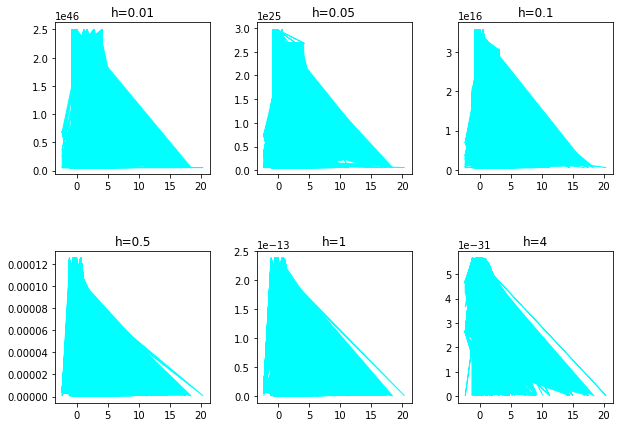

In [ ]:
#Gaussian kernel

bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
#bandwidths = [36, 64, 128, 256, 512]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(9) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    #print (ind)
    kde_model.fit(df)
    score = kde_model.score_samples(df)
    plt.subplot(ind)
    plt.fill(df, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [ ]:
print("optimal bandwidth: " + "{:.2f}".format(kde_model.bandwidth))

optimal bandwidth: 4.00


In [ ]:
# kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
# plt_ind = np.arange(6) + 231

# for k, ind in zip(kernels, plt_ind):
#     kde_model = KernelDensity(kernel=k)
#     kde_model.fit([[0]])
#     score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None])
#     plt.subplot(ind)
#     plt.fill(np.arange(-2, 2, 0.1)[:, None], np.exp(score), c='blue')
#     plt.title(k)

# fig.subplots_adjust(hspace=0.5, wspace=.3)
# plt.show()

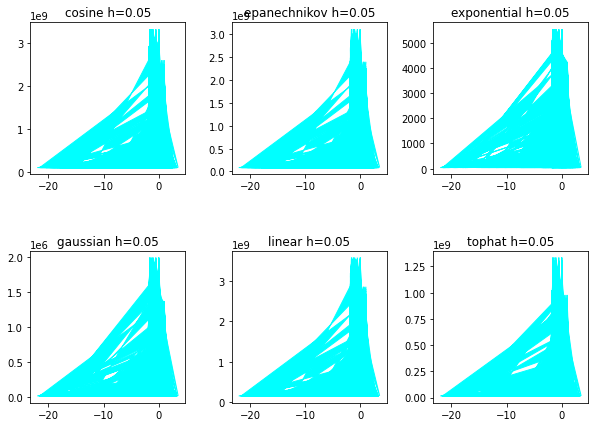

In [ ]:
def my_scores(estimator, X):
    scores = estimator.score_samples(X)
    # Remove -inf
    scores = scores[scores != float('-inf')]
    # Return the mean values
    return np.mean(scores)

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231
h_vals = np.arange(0.05, 1, .1)

for k, ind in zip(kernels, plt_ind):
    grid = GridSearchCV(KernelDensity(kernel=k),
                        {'bandwidth': h_vals},
                        scoring=my_scores)
    grid.fit(df)
    kde = grid.best_estimator_
    log_dens = kde.score_samples(df)
    plt.subplot(ind)
    plt.fill(df, np.exp(log_dens), c='cyan')
    plt.title(k + " h=" + "{:.2f}".format(kde.bandwidth))

fig.subplots_adjust(hspace=.5, wspace=.3)
plt.show()

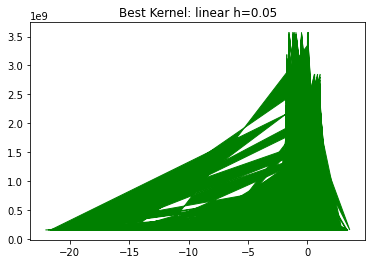

In [ ]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': h_vals, 'kernel': kernels},
                    scoring=my_scores)
grid.fit(df)
best_kde = grid.best_estimator_
log_dens = best_kde.score_samples(df)
plt.fill(df, np.exp(log_dens), c='green')
plt.title("Best Kernel: " + best_kde.kernel+" h="+"{:.2f}".format(best_kde.bandwidth))
plt.show()

In [ ]:
train_data = df.iloc[:, :-1]
train_labels = df.iloc[:,-1]

In [ ]:
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()

#np.save('train_data.npy', train_data)

In [ ]:
train_data

array([[-1.77342041, -1.70684304, -1.64043961, -1.74085633,  1.03000751],
       [-0.62933683, -0.56131219, -1.64040369, -0.59553922,  1.11051566],
       [-0.62933683, -0.56131219, -1.64036777, -0.59553922,  1.11051566],
       ...,
       [-1.16038677, -1.16968153,  1.75710527, -1.16555879, -0.21298915],
       [ 0.58186185,  0.56997901,  1.75710527,  0.57616769, -0.17079784],
       [ 0.64791766,  0.64108177,  1.75710527,  0.64478116, -0.08286486]])

In [ ]:
samples = np.load('train_data.npy')
X = samples
# pi0 = samples['pi0']
# mu0 = samples['mu0']
# sigma0 = samples['sigma0']
# plt.scatter(X[:, 0], X[:, 1], c='grey', s=30)
# plt.axis('equal')
# plt.show()
# print(pi0, mu0)